# **Análisis Exploratorio de Datos (EDA)**

## **Librerías y modulos necesarios**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

## **Contextualización de los datos**

El conjunto de datos a tratar cuenta con información sobre variables climáticas esenciales capturadas en una región costera mediante un sistema de monitoreo atmosférico que comenzó a operar el **1 de enero de 2022**. Este sistema incluye anemómetros acústicos ubicados a 100 m, 80 m, 60 m y 40 m de altura para registrar la velocidad del viento, así como veletas que miden su dirección a esas mismas alturas. También dispone de sensores de temperatura a 100 m y 20 m, y sensores de presión atmosférica y humedad relativa. Las mediciones se toman a intervalos de **10 minutos**, permitiendo la captura de datos en alta frecuencia y con un alto grado de detalle. Gracias a esta estructura de monitoreo, el conjunto de datos proporciona una base sólida para desarrollar modelos predictivos y analizar el comportamiento del viento y sus variaciones en tiempo real, fundamentales para la gestión y optimización de recursos energéticos eólicos en la región de estudio.

## **Conjunto de datos**

In [45]:
file_path = r"C:\Users\kamac\OneDrive\Desktop\MachineLearningUN\EDA\data_ws.xlsx"
data = pd.read_excel(file_path)

### **Características del conjunto de datos**

Inicialmente, se observan las primeras **5 observaciones** del conjunto de datos con el uso del método `.head()`

In [46]:
data.head()

,SoftwareVersion,buildbuiltbyCIserver20210728,VarName3,VarName4,VarName5,VarName6,VarName7,VarName8,VarName9,VarName10,...,VarName51,VarName52,VarName53,VarName54,VarName55,VarName56,VarName57,VarName58,VarName59,VarName60
0,2022-01-01 00:00:00,16.060860,0.958639,13.15692,18.76164,18.468434,15.830104,0.959005,12.85460,18.23426,...,0.0,0.0,0.0,0.000076,61.08,3.08,143.8,61.21,3.39,143.8
1,2022-01-01 00:10:00,16.156927,0.885824,13.48116,18.06684,17.850526,15.972642,0.891046,13.59028,18.41818,...,0.0,0.0,0.0,0.000076,61.08,2.83,143.8,61.49,3.36,143.8
2,2022-01-01 00:20:00,16.473571,0.911763,13.48116,18.48372,18.298440,16.287375,0.914220,13.49832,18.37220,...,0.0,0.0,0.0,0.000076,60.42,2.74,143.8,60.65,3.11,143.8
3,2022-01-01 00:30:00,16.660009,0.860070,14.31492,19.27116,18.931634,16.451707,0.842721,13.77420,18.69406,...,0.0,0.0,0.0,0.000000,60.88,2.83,143.8,61.19,3.16,143.8
4,2022-01-01 00:40:00,16.519613,0.903333,13.89804,19.31748,18.561074,16.353678,0.889667,13.63626,19.15386,...,0.0,0.0,0.0,0.000076,59.99,2.59,143.8,60.26,3.21,143.8


Observamos que la mayoría de las variables en el conjunto de datos son de tipo numérico, con una excepción de tipo categórico. Además, los nombres de las columnas son poco descriptivos, lo cual dificulta su comprensión; por lo tanto, se plantea la posibilidad de renombrar las variables más adelante para mejorar la claridad del análisis.

In [47]:
data.shape

(19105, 60)

Al usar el método `.shape` observamos que el conjunto de datos contiene **60** variables y **19105** observaciones.

## **Reorganización del conjunto de datos**

Dado a la naturaleza de los datos previamente vista, se tomó la decisión de dividir y reorganizar la base de datos en subconjuntos correspondientes a distintas partes y características de esta; permitiendo así un mejor manejo de los datos a modelar. También se convierte la columna `SoftwareVersion` en formato de fecha utilizando datetime para facilitar el análisis temporal de los datos.

In [48]:
data.rename(columns = {'buildbuiltbyCIserver20210728': 'VarName2'}, inplace = True)
data['Fecha'] = pd.to_datetime(data['SoftwareVersion'])
subconjuntos = {
    'Wind speed 100 m (sensor 1)': ['VarName2', 'VarName3', 'VarName4', 'VarName5', 'VarName6'],
    'Wind speed 100 m (sensor 2)': ['VarName7', 'VarName8', 'VarName9', 'VarName10', 'VarName11'],
    'Wind speed 80 m (sensor 1)': ['VarName12', 'VarName13', 'VarName14', 'VarName15', 'VarName16'],
    'Wind speed 80 m (sensor 2)': ['VarName17', 'VarName18', 'VarName19', 'VarName20', 'VarName21'],
    'Wind speed 60 m': ['VarName22', 'VarName23', 'VarName24', 'VarName25', 'VarName26'],
    'Wind speed 40 m': ['VarName27', 'VarName28', 'VarName29', 'VarName30', 'VarName31'],
    'Wind direction 60 m': ['VarName32', 'VarName33', 'VarName34'],
    'Presión': ['VarName35', 'VarName36', 'VarName37', 'VarName38'],
    'Humedad': ['VarName39', 'VarName40', 'VarName41', 'VarName42'],
    'Temperatura 100 m': ['VarName43', 'VarName44', 'VarName45', 'VarName46'],
    'Temperatura 21 m': ['VarName47', 'VarName48', 'VarName49', 'VarName50'],
    'Canal vacío': ['VarName51', 'VarName52', 'VarName53', 'VarName54'],
    'Wind direction 100 m': ['VarName55', 'VarName56', 'VarName57'],
    'Wind direction 80 m': ['VarName58', 'VarName59', 'VarName60']
}


Así se verían los subconjuntos:



| **Variable**                   | **Wind speed 100 m (sensor 1)** | **Wind speed 100 m (sensor 2)** | **Wind speed 80 m (sensor 1)** | **Wind speed 80 m (sensor 2)** | **Wind speed 60 m** | **Wind speed 40 m** | **Wind direction 60 m** | **Wind direction 100 m** | **Wind direction 80 m** | **Presión** | **Humedad** | **Temperature 100 m** | **Temperature 21 m** | **Canal vacío** |
|--------------------------------|---------------------------------|---------------------------------|---------------------------------|---------------------------------|-----------------------|-----------------------|--------------------------|--------------------------|--------------------------|--------------|-------------|------------------------|-----------------------|-----------------|
| **1. Promedio (AVG)**          | VarName2                        | VarName7                        | VarName12                       | VarName17                       | VarName22            | VarName27            | VarName32                | VarName55                | VarName58                | VarName35    | VarName39   | VarName43              | VarName47             | VarName51       |
| **2. Desviación Estándar (SD)** | VarName3                        | VarName8                        | VarName13                       | VarName18                       | VarName23            | VarName28            | VarName33                | VarName56                | VarName59                | VarName36    | VarName40   | VarName44              | VarName48             | VarName52       |
| **3. Valor Mínimo (Min)**       | VarName4                        | VarName9                        | VarName14                       | VarName19                       | VarName24            | VarName29            |                          |                          |                          | VarName37    | VarName41   | VarName45              | VarName49             | VarName53       |
| **4. Valor Máximo (Max)**       | VarName5                        | VarName10                       | VarName15                       | VarName20                       | VarName25            | VarName30            |                          |                          |                          | VarName38    | VarName42   | VarName46              | VarName50             | VarName54       |
| **5. Ráfaga Máxima (Gust)**     | VarName6                        | VarName11                       | VarName16                       | VarName21                       | VarName26            | VarName31            | VarName34                | VarName57                | VarName60                |              |             |                        |                       |                 |



### **Reducción de Dimensionalidad**

Para simplificar el análisis y reducir la dimensionalidad del conjunto de datos, se opta por conservar únicamente la variable de **promedio (AVG)** para cada medición. El promedio proporciona una medida representativa del comportamiento general de las variables (como velocidad del viento, temperatura, presión, etc.) en cada intervalo de 10 minutos. Además, se eliminará la variable de **Canal Vacío**, ya que esta columna no contiene información relevante o valores de medición que puedan aportar al análisis. Mantenerla solo añadiría ruido al conjunto de datos, complicando innecesariamente el procesamiento y análisis de las variables significativas.

No se aplicará el **Factor de Inflación de Varianza (VIF)**, ya que su uso podría eliminar de forma inconsistente diferentes estadísticas en cada variable, como el promedio en algunas y la desviación estándar en otras. Esto resultaría en un conjunto de datos inconsistente, donde las variables no tendrían el mismo tipo de estadístico representativo, lo cual dificultaría el análisis y la interpretación. Al mantener solo el promedio, se asegura que todas las variables posean un valor consistente y representativo, facilitando una interpretación coherente y un análisis robusto de las tendencias generales.

Entonces, contariamos con las siguientes variables: 

| **Variable**          | **Valor**    |
|-----------------------|--------------|
| **Wind speed 100 m (sensor 1)** | VarName2      |
| **Wind speed 100 m (sensor 2)** | VarName7      |
| **Wind speed 80 m (sensor 1)**   | VarName12     |
| **Wind speed 80 m (sensor 2)**   | VarName17     |
| **Wind speed 60 m**              | VarName22     |
| **Wind direction 60 m**          | VarName32     |
| **Wind direction 100 m**         | VarName55     |
| **Wind direction 80 m**          | VarName58     |
| **Presión**                      | VarName35     |
| **Humedad**                      | VarName39     |
| **Temperature 100 m**            | VarName43     |
| **Temperature 21 m**             | VarName47     |



Ahora, filtramos el conjunto de datos para conservar únicamente las variables de interés:

In [49]:
variables = [
    'Fecha', 'VarName2', 'VarName7', 'VarName12', 'VarName17',
    'VarName22', 'VarName32', 'VarName55', 'VarName58',
    'VarName35', 'VarName39', 'VarName43', 'VarName47'
]
data = data[variables]
data.head()

,Fecha,VarName2,VarName7,VarName12,VarName17,VarName22,VarName32,VarName55,VarName58,VarName35,VarName39,VarName43,VarName47
0,2022-01-01 00:00:00,16.060860,15.830104,15.145418,15.125038,14.300989,61.98,61.08,61.21,1005.963541,75.042725,26.922913,26.707773
1,2022-01-01 00:10:00,16.156927,15.972642,15.290614,15.352352,14.533556,62.29,61.08,61.49,1005.795867,73.509216,27.006836,26.772633
2,2022-01-01 00:20:00,16.473571,16.287375,15.599149,15.562022,14.808378,61.18,60.42,60.65,1005.739976,72.914124,26.991577,26.772633
3,2022-01-01 00:30:00,16.660009,16.451707,15.801446,15.779687,15.170287,62.20,60.88,61.19,1005.684085,73.165894,26.877136,26.659982
4,2022-01-01 00:40:00,16.519613,16.353678,15.851963,15.749131,14.927282,61.26,59.99,60.26,1005.609563,73.791504,26.770325,26.601949


### **Renombrado de variables**

A continuación, realizaremos un renombrado de variables en nuestro conjunto de datos para facilitar su identificación y comprensión. Este cambio permitirá que cada variable tenga un nombre más descriptivo, reflejando su contenido y las características específicas de las mediciones, lo cual facilitará el análisis y la interpretación de los datos en los siguientes pasos del proyecto.

In [50]:
data = data.rename(columns = {
    'Fecha': 'Fecha',
    'VarName2': 'VelViento100m_1',
    'VarName7': 'VelViento100m_2',
    'VarName12': 'VelViento80m_1',
    'VarName17': 'VelViento80m_2',
    'VarName22': 'VelViento60m',
    'VarName32': 'DirViento60m',
    'VarName55': 'DirViento100m',
    'VarName58': 'DirViento80m',
    'VarName35': 'Presion',
    'VarName39': 'Humedad',
    'VarName43': 'Temp100m',
    'VarName47': 'Temp21m'
})


In [51]:
data.head()

,Fecha,VelViento100m_1,VelViento100m_2,VelViento80m_1,VelViento80m_2,VelViento60m,DirViento60m,DirViento100m,DirViento80m,Presion,Humedad,Temp100m,Temp21m
0,2022-01-01 00:00:00,16.060860,15.830104,15.145418,15.125038,14.300989,61.98,61.08,61.21,1005.963541,75.042725,26.922913,26.707773
1,2022-01-01 00:10:00,16.156927,15.972642,15.290614,15.352352,14.533556,62.29,61.08,61.49,1005.795867,73.509216,27.006836,26.772633
2,2022-01-01 00:20:00,16.473571,16.287375,15.599149,15.562022,14.808378,61.18,60.42,60.65,1005.739976,72.914124,26.991577,26.772633
3,2022-01-01 00:30:00,16.660009,16.451707,15.801446,15.779687,15.170287,62.20,60.88,61.19,1005.684085,73.165894,26.877136,26.659982
4,2022-01-01 00:40:00,16.519613,16.353678,15.851963,15.749131,14.927282,61.26,59.99,60.26,1005.609563,73.791504,26.770325,26.601949


Cada observación en el conjunto de datos representa el **promedio de las mediciones** tomadas durante un intervalo de 10 minutos para cada una de las variables monitoreadas. Estas incluyen la velocidad del viento a distintas alturas (40 m, 60 m, 80 m, y 100 m), la dirección del viento, la presión atmosférica, la humedad relativa y la temperatura en diferentes niveles. 

In [52]:
data.shape

(19105, 13)

Luego de la reorganización de variables, nos quedamos con un conjunto de datos de **19105 observaciones y 13 variables**. Este conjunto de datos incluye las mediciones promedio tomadas cada 10 minutos para las variables seleccionadas, permitiendo un análisis más enfocado y manejable de las condiciones atmosféricas en la región de estudio.

### **Diccionario de variables**

| **Nombre**     | **Descripción**                                      | **Unidad de Medida** |
|----------------------|------------------------------------------------------|-----------------------|
| `Fecha`              | Fecha y hora de la medición                          | -                     |
| `VelViento100m_1`    | Velocidad del viento a 100 m (sensor 1)              | m/s                   |
| `VelViento100m_2`    | Velocidad del viento a 100 m (sensor 2)              | m/s                   |
| `VelViento80m_1`     | Velocidad del viento a 80 m (sensor 1)               | m/s                   |
| `VelViento80m_2`     | Velocidad del viento a 80 m (sensor 2)               | m/s                   |
| `VelViento60m`       | Velocidad del viento a 60 m                          | m/s                   |
| `DirViento60m`       | Dirección del viento a 60 m                          | Grados (°)            |
| `DirViento100m`      | Dirección del viento a 100 m                         | Grados (°)            |
| `DirViento80m`       | Dirección del viento a 80 m                          | Grados (°)            |
| `Presion`            | Presión atmosférica                                  | hPa                   |
| `Humedad`            | Humedad relativa                                     | %                     |
| `Temp100m`           | Temperatura a 100 m                                  | °C                    |
| `Temp21m`            | Temperatura a 21 m                                   | °C                    |



### **Aspectos a tener en cuenta**

- La velocidad del viento a 100 m y a 80 m se registra mediante dos tipos de sensores: el sensor 1, orientado al noroeste (NW), y el sensor 2, orientado al sureste (SE).
- La velocidad del viento a 60 m cuenta únicamente con observaciones del sensor 1 (NW).
- Las variables explicativas de la velocidad del viento están orientadas en dirección noroeste NW.

Aunque las variables explicativas están orientadas en NW y se dispone de datos de velocidad del viento en ambas orientaciones (NW y SE), se llevará a cabo el análisis y la implementación de modelos de machine learning para estudiar el comportamiento de la velocidad del viento en función de estas orientaciones. Esto permitirá evaluar el impacto de las diferentes orientaciones en la dinámica del viento y optimizar la precisión del modelo.


## **Datos faltantes**

En esta sección, se examina el porcentaje de valores faltantes en las principales variables seleccionadas del dataset. El análisis gráfico de los valores faltantes proporciona una visión clara de la magnitud y distribución de los datos faltantes en cada variable, permitiendo identificar posibles problemas de calidad de datos que podrían afectar el análisis.

In [53]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage.sort_values(ascending = False)

Fecha              0.0
VelViento100m_1    0.0
VelViento100m_2    0.0
VelViento80m_1     0.0
VelViento80m_2     0.0
VelViento60m       0.0
DirViento60m       0.0
DirViento100m      0.0
DirViento80m       0.0
Presion            0.0
Humedad            0.0
Temp100m           0.0
Temp21m            0.0
dtype: float64

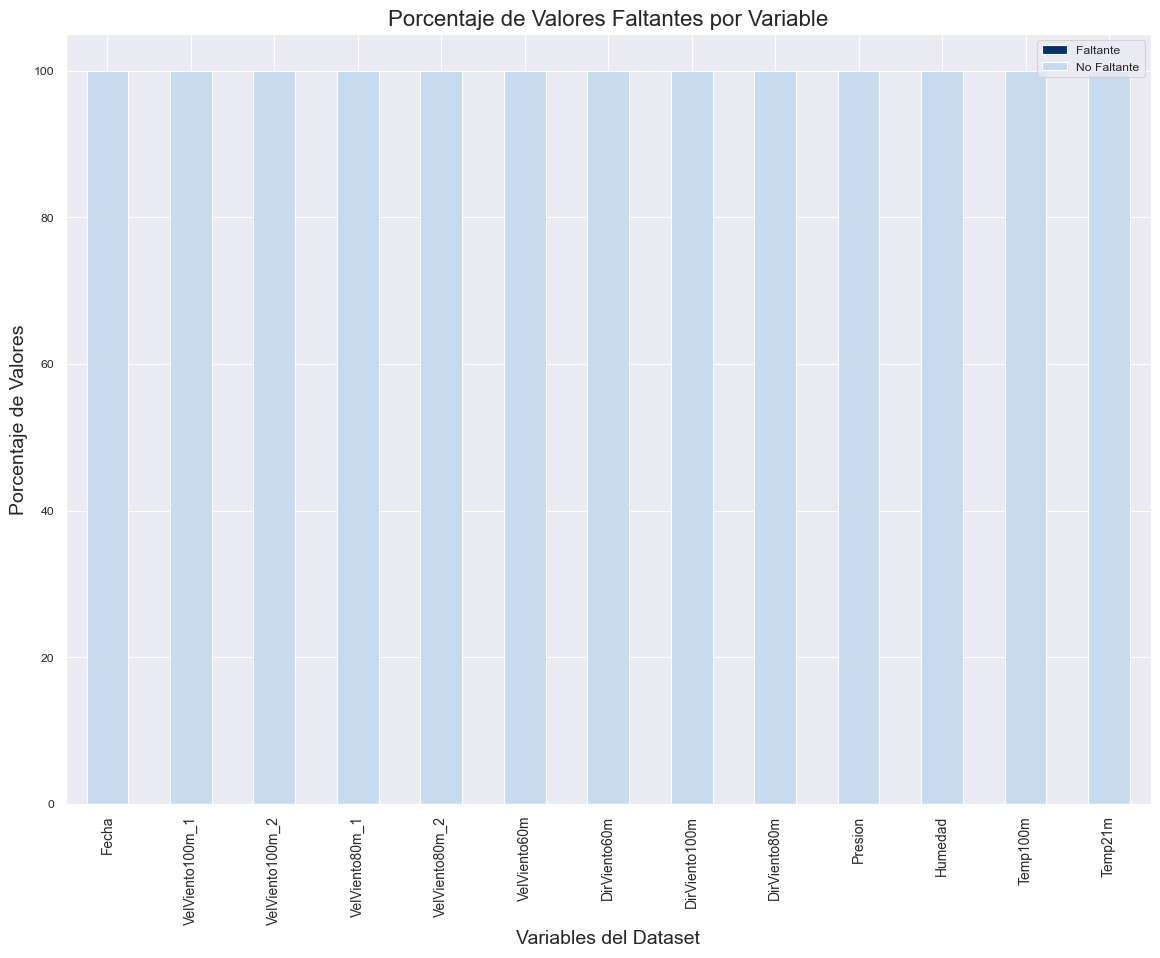

In [54]:
missing_percentages = (data.isnull().mean() * 100).sort_values(ascending = False)
missing_data = pd.DataFrame({'Faltante': missing_percentages, 'No Faltante': 100 - missing_percentages})
plt.figure(figsize=(14, 10)) 
missing_data.plot(kind='bar', stacked=True, color=['#08306b','#c6dbef'], ax=plt.gca()) 
plt.title('Porcentaje de Valores Faltantes por Variable', fontsize=16)
plt.xlabel('Variables del Dataset', fontsize=14)
plt.ylabel('Porcentaje de Valores', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  
plt.legend(['Faltante', 'No Faltante'], loc='upper right')


## **Análisis por variable**

### **Métodos a usar**

Antes de proceder con el análisis de cada variable, se desarrollan métodos específicos para simplificar la codificación y optimizar el flujo del análisis, logrando así un proceso más eficiente y organizado. Los métodos creados son los siguientes:

1. **`plot_acf_pacf`**: Genera las gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF) para analizar la dependencia temporal de cada variable.
2. **`descomponer_serie`**: Realiza la descomposición estacional de cada serie temporal, permitiendo visualizar sus componentes de tendencia, estacionalidad y ruido.
3. **`plot_histogram_and_boxplot`**: Genera el histograma y el boxplot de cada variable para examinar su distribución y detectar posibles valores atípicos.

In [55]:
def plot_acf_pacf(data, column, lags = 40, title = ''):
    fig, axes = plt.subplots(1, 2, figsize = (14, 5))
    
    # Gráfico de Autocorrelación (ACF)
    plot_acf(data[column], ax = axes[0], lags = lags)
    axes[0].set_title(f'Autocorrelación (ACF) - {title}')
    
    # Gráfico de Autocorrelación Parcial (PACF)
    plot_pacf(data[column], ax = axes[1], lags = lags)
    axes[1].set_title(f'Autocorrelación Parcial (PACF) - {title}')
    
    plt.tight_layout()
    plt.show()

In [56]:
def descomponer_serie(data, columna, periodo, modelo, titulo, axs=None):
    # Realizar la descomposición estacional
    descomposicion = seasonal_decompose(data[columna], model=modelo, period=periodo)
    
    # Si no se proporcionan ejes, crear una nueva figura
    if axs is None:
        fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 8))
    
    # Graficar la serie original, tendencia, estacionalidad y residuales en los ejes proporcionados
    axs[0].plot(descomposicion.observed)
    axs[0].set_ylabel('Original')
    axs[0].set_title(titulo)
    
    axs[1].plot(descomposicion.trend, color='red')
    axs[1].set_ylabel('Tendencia')
    
    axs[2].plot(descomposicion.seasonal, color='green')
    axs[2].set_ylabel('Estacionalidad')
    
    axs[3].plot(descomposicion.resid, color='black')
    axs[3].set_ylabel('Residuales')
    axs[3].set_xlabel('Fecha')

In [57]:
def plot_histogram_and_boxplot(data, column, title):

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histograma con KDE
    sns.histplot(data[column], kde=True, color='#473C8B', ax=axes[0])
    axes[0].set_title(f'Distribución de {title}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frecuencia')

    # Diagrama de cajas horizontal
    sns.boxplot(x=data[column], color='#473C8B', ax=axes[1], orient='h')
    axes[1].set_title(f'Diagrama de Cajas de {title}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('')


    plt.tight_layout()
    plt.show()

### **Análisis general de las variables**

Aquí analizamos las principales estadísticas de cada variable usando el método `describe(include = 'number')`

In [58]:
data.describe(include = 'number')

,VelViento100m_1,VelViento100m_2,VelViento80m_1,VelViento80m_2,VelViento60m,DirViento60m,DirViento100m,DirViento80m,Presion,Humedad,Temp100m,Temp21m
count,19105.000000,19105.000000,19105.000000,19105.000000,19105.000000,19105.000000,19105.000000,19105.000000,19105.000000,19105.000000,19105.000000,19105.000000
mean,12.299370,12.165388,11.922609,11.919300,11.595240,67.366088,66.078548,66.379795,1006.204423,84.496944,26.273799,26.493253
std,4.466870,4.418245,4.301851,4.291515,4.136056,48.626800,48.900081,48.760917,1.824096,4.305227,0.846237,0.951251
min,0.251334,0.225181,0.236040,0.255526,0.292860,0.230000,0.000000,0.030000,1001.417712,63.072205,23.710938,22.700129
25%,9.779127,9.685888,9.565355,9.577816,9.400946,48.860000,47.860000,47.910000,1004.901606,81.642151,25.709839,25.823634
50%,12.935835,12.804114,12.548935,12.553308,12.219060,56.490000,55.300000,55.580000,1006.112585,84.640503,26.068420,26.328856
75%,15.555045,15.377155,15.028957,15.014298,14.557787,64.460000,63.030000,63.430000,1007.435347,87.669373,26.587219,26.997935
max,22.301553,22.027242,21.730798,21.769775,21.140790,359.900000,359.950000,359.890000,1012.428307,94.093323,33.903809,34.596755


El análisis estadístico descriptivo muestra un resumen de las variables de velocidad y dirección del viento, presión, humedad y temperatura, obtenidas a partir de datos promediados cada 10 minutos. A continuación, se destacan algunos puntos clave:

- **Velocidad del Viento**: Las velocidades promedio en los diferentes sensores y alturas (100 m, 80 m, y 60 m) varían entre 11.59 m/s y 12.30 m/s, con desviaciones estándar en el rango de 4.13 a 4.67 m/s. Los valores máximos alcanzan hasta 22.30 m/s a 100 m de altura.
  
- **Dirección del Viento**: Las direcciones promediadas muestran una media cercana a 67°, indicando una predominancia en dirección noreste. La alta desviación estándar (aproximadamente 48°) sugiere variabilidad significativa en las direcciones del viento, con un rango completo de 0° a 359°.

- **Presión Atmosférica**: La presión promedio es de 1006.2 hPa, con una desviación estándar relativamente baja (1.82 hPa), lo que indica estabilidad en esta variable, oscilando entre 1001 y 1012 hPa.

- **Humedad Relativa**: La humedad tiene un promedio de 84.5%, con una variabilidad de 4.3%, fluctuando entre 63% y 94%, lo cual refleja condiciones de humedad alta y relativamente estables.

- **Temperatura**: Las temperaturas a 100 m y 21 m promedian 26.2 °C y 26.5 °C, respectivamente, con ligeras variaciones. Los máximos registrados son de 33.9 °C y 34.5 °C, y la temperatura mínima registrada es de aproximadamente 23 °C.

Este resumen estadístico indica que las variables presentan características estables, aunque la dirección del viento muestra una mayor dispersión, posiblemente debido a cambios en patrones atmosféricos o eventos específicos en el área de estudio.

### **Análisis individual de las variables**

En las siguientes secciones, se presenta un análisis temporal y descriptivo de cada variable, con el objetivo de determinar su distribución, visualizar sus características principales y resaltar patrones significativos. Para cada variable se analizarán los siguientes aspectos:

- Gráfica de la serie original: Visualización inicial de la tendencia y fluctuaciones de la serie.
- Gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF): Evaluación de la dependencia temporal en diferentes retardos.
- Descomposición estacional: Separación de los componentes de tendencia, estacionalidad y residuales.

### **Variable: Velocidad del viento a 100m**

#### **Serie original**

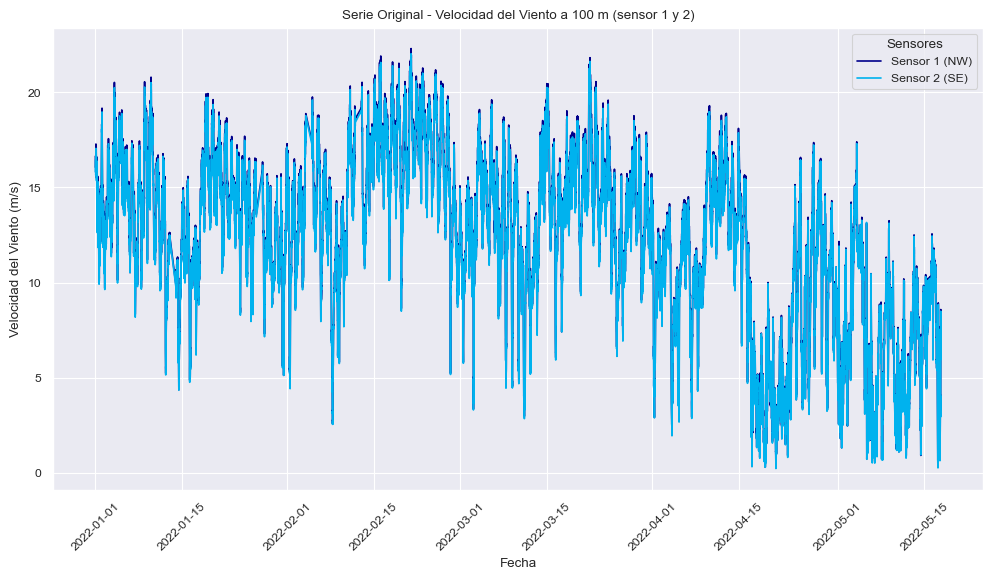

In [59]:
sns.set_theme()
sns.set_context("paper")

plt.figure(figsize = (12, 6))
sns.lineplot(data = data, x =  data['Fecha'], y = data['VelViento100m_1'], label = 'Sensor 1 (NW)', color = '#00008B')
sns.lineplot(data = data, x = data['Fecha'], y = data['VelViento100m_2'], label = 'Sensor 2 (SE)', color = '#00B2EE')

plt.title('Serie Original - Velocidad del Viento a 100 m (sensor 1 y 2)')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend(title = 'Sensores', loc = 'upper right')
plt.xticks(rotation=45)

plt.show()


#### **Autocorrelación y autocorrelación parcial**

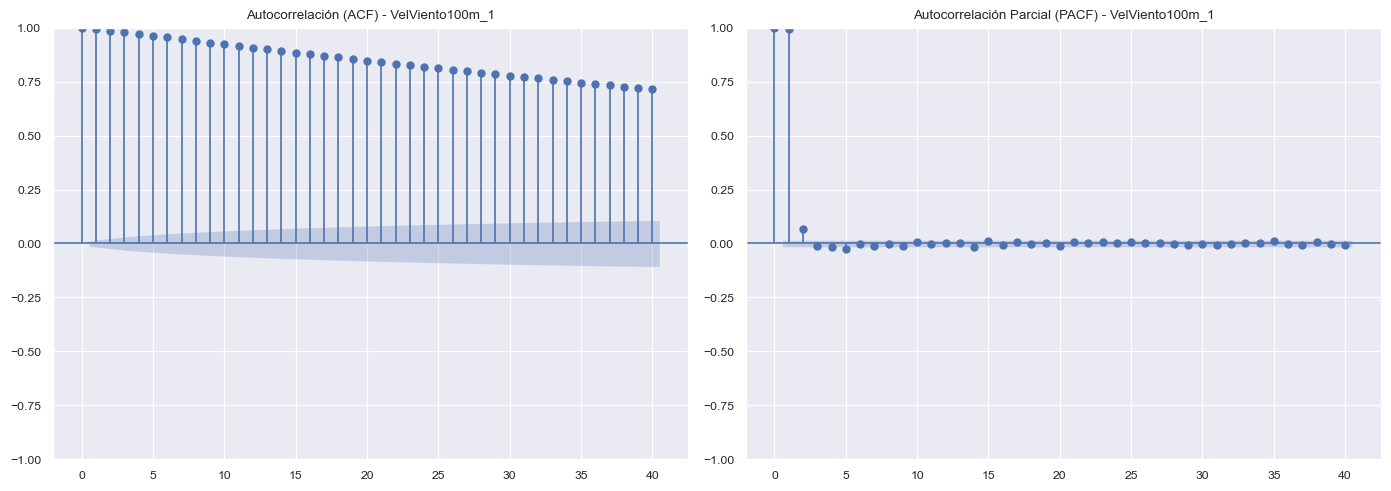

In [60]:
plot_acf_pacf(data, column = 'VelViento100m_1', title = 'VelViento100m_1')

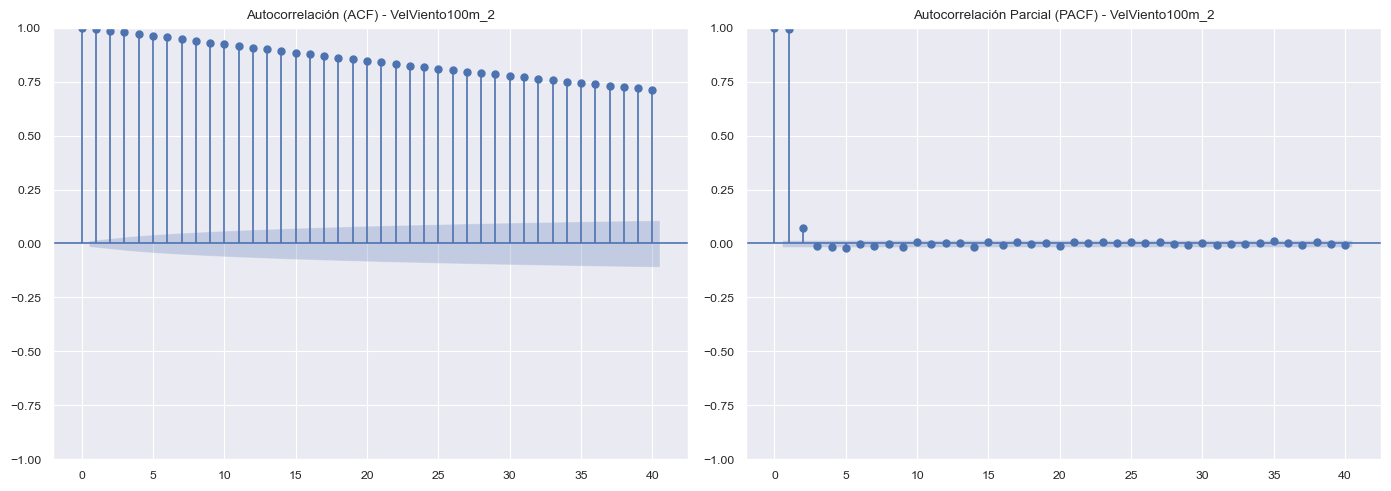

In [61]:
plot_acf_pacf(data, column = 'VelViento100m_2', title = 'VelViento100m_2')

#### **Descomposición de la serie**

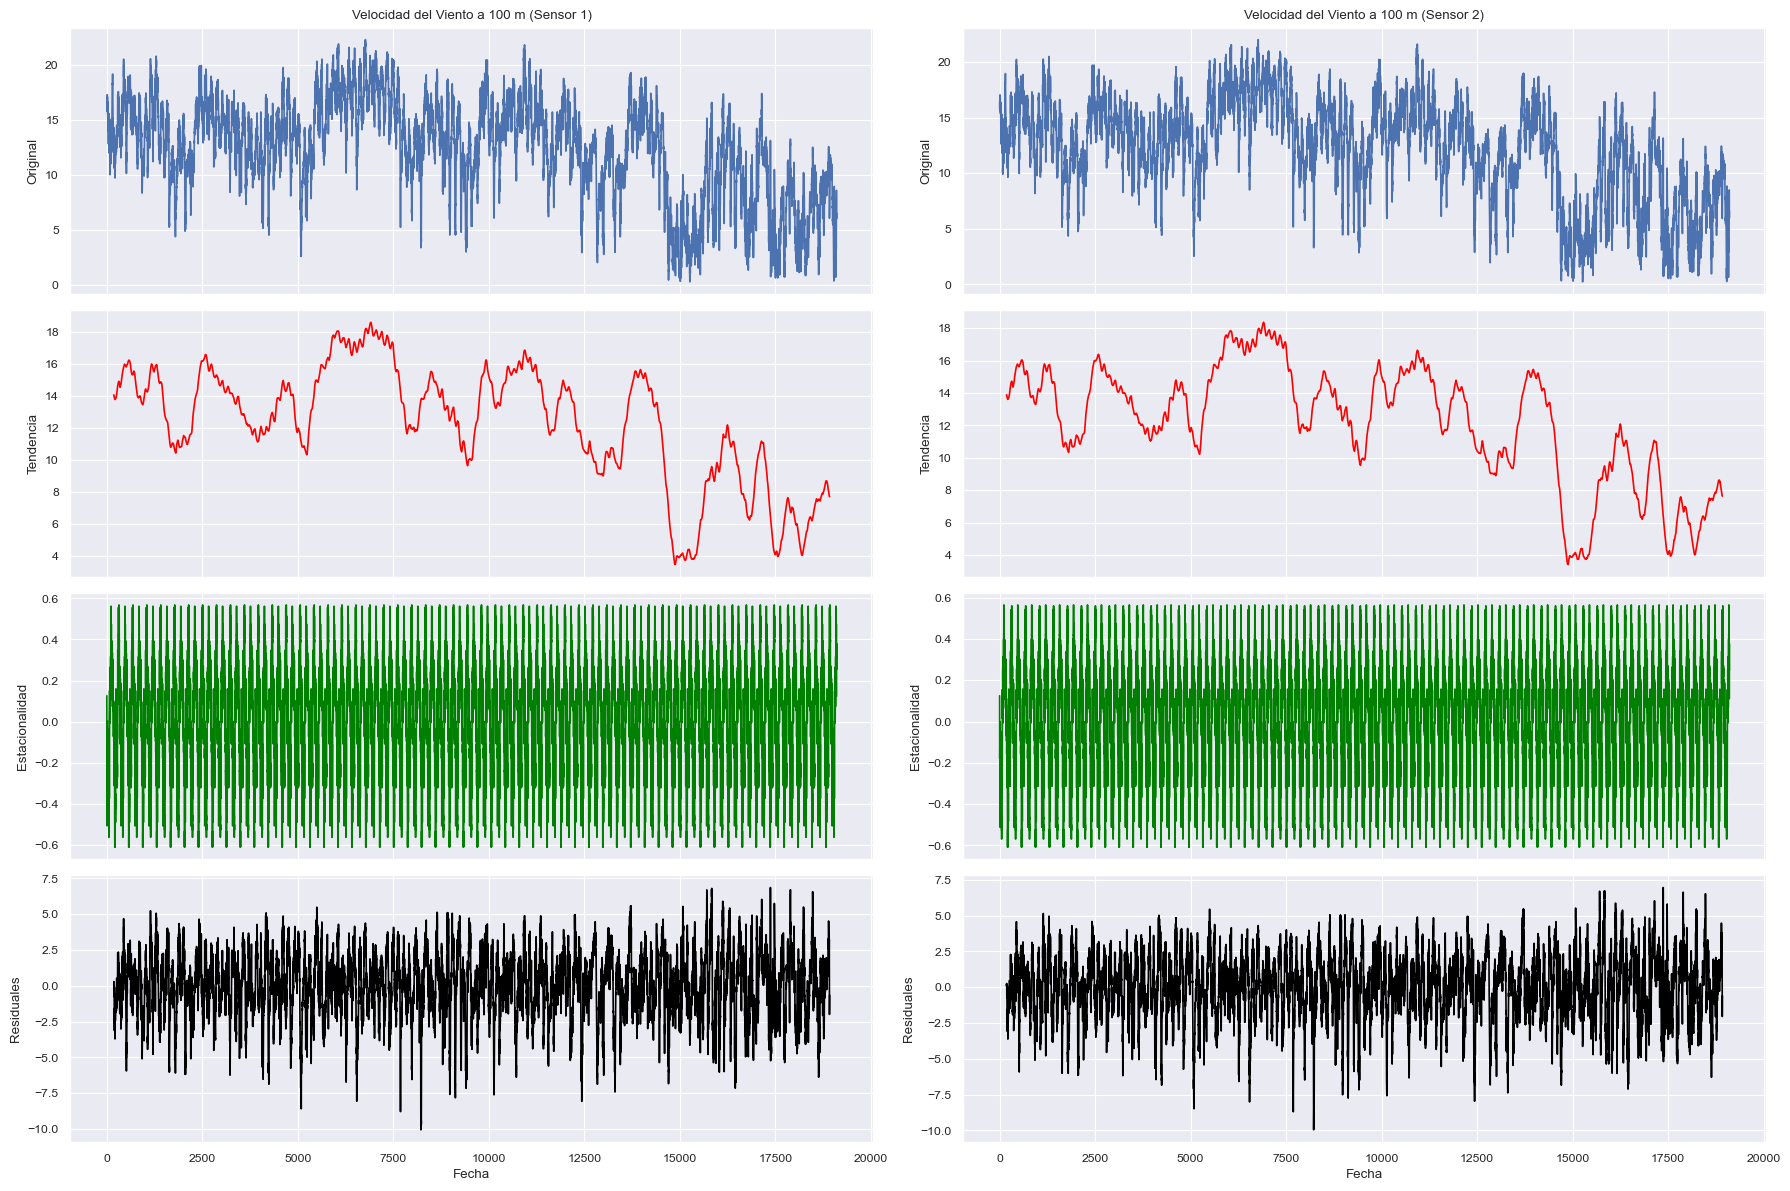

In [62]:
# Crear una figura con dos columnas para colocar cada descomposición en una sola fila
fig, axs = plt.subplots(4, 2, figsize=(18, 12), sharex=True)

# Llamar a la función `descomponer_serie` pasando los ejes para cada sensor
descomponer_serie(data, columna='VelViento100m_1', periodo=365, modelo='additive', 
                  titulo='Velocidad del Viento a 100 m (Sensor 1)', axs=axs[:, 0])

descomponer_serie(data, columna='VelViento100m_2', periodo=365, modelo='additive', 
                  titulo='Velocidad del Viento a 100 m (Sensor 2)', axs=axs[:, 1])

# Ajuste de la visualización
plt.tight_layout()
plt.show()

#### **Interpretación de los resultados**

En el análisis de la **velocidad del viento a 100 m** con los sensores orientados al NW y SE, se observan varias características clave:

1. **Serie Original**: Ambas series muestran fluctuaciones significativas en la velocidad del viento, con valores que alcanzan más de 20 m/s en varios puntos. Esto indica condiciones variables de viento a lo largo del tiempo, donde la velocidad tiende a oscilar entre valores bajos y altos de manera continua.

2. **ACF y PACF**: En ambas series, los gráficos de autocorrelación (ACF) y autocorrelación parcial (PACF) indican una alta dependencia temporal, especialmente en los primeros rezagos. Esto sugiere que los valores previos de la velocidad del viento tienen una fuerte influencia en los valores futuros, lo que podría facilitar el modelado predictivo.

3. **Descomposición**: Al descomponer la serie en tendencia, estacionalidad y residuos, se observa una tendencia general que varía a lo largo del tiempo, acompañada de una clara componente estacional. Esto indica que el comportamiento del viento sigue patrones específicos, posiblemente relacionados con factores climáticos o de ubicación. Los residuos no muestran patrones visibles, lo cual es un buen indicador de que la descomposición captura la mayor parte de la estructura de la serie.


### **Variable: Velocidad del viento a 80m**

#### **Serie original**

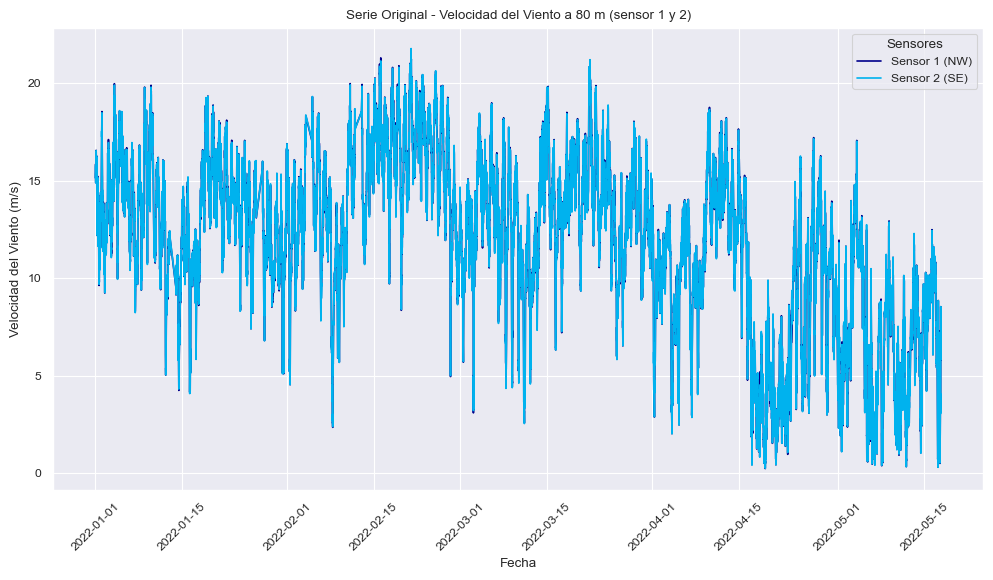

In [63]:
sns.set_theme()
sns.set_context("paper")

plt.figure(figsize = (12, 6))
sns.lineplot(data = data, x =  data['Fecha'], y = data['VelViento80m_1'], label = 'Sensor 1 (NW)', color = '#00008B')
sns.lineplot(data = data, x = data['Fecha'], y = data['VelViento80m_2'], label = 'Sensor 2 (SE)', color = '#00B2EE')

plt.title('Serie Original - Velocidad del Viento a 80 m (sensor 1 y 2)')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend(title = 'Sensores', loc = 'upper right')
plt.xticks(rotation=45)

plt.show()

#### **Autocorrelación y autocorrelación parcial**

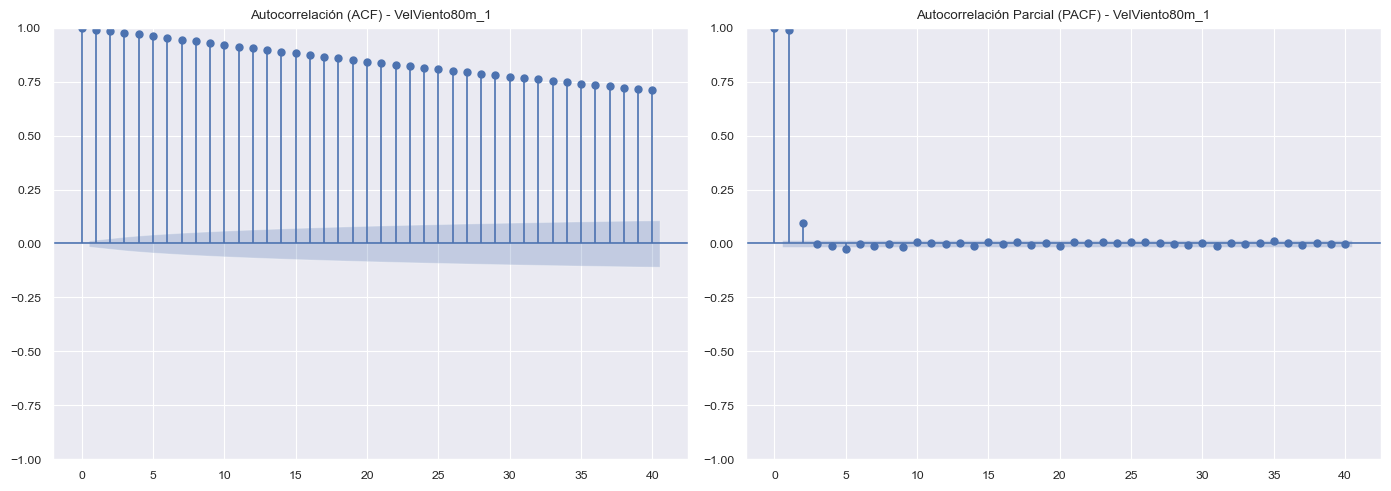

In [64]:
plot_acf_pacf(data, column = 'VelViento80m_1', title = 'VelViento80m_1')

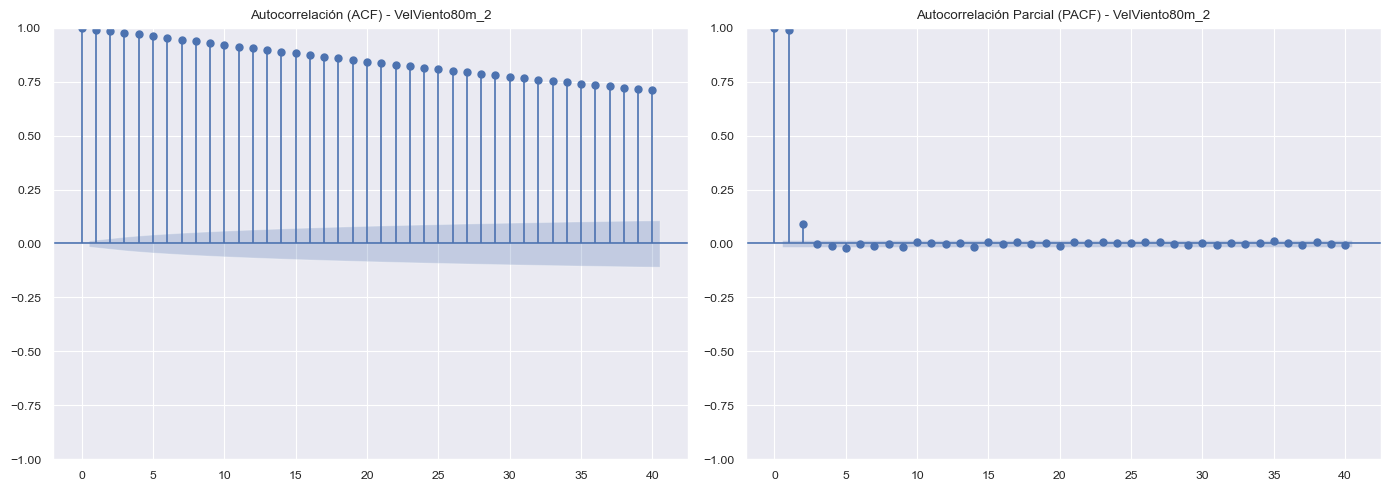

In [65]:
plot_acf_pacf(data, column = 'VelViento80m_2', title = 'VelViento80m_2')

#### **Descomposición de la serie**

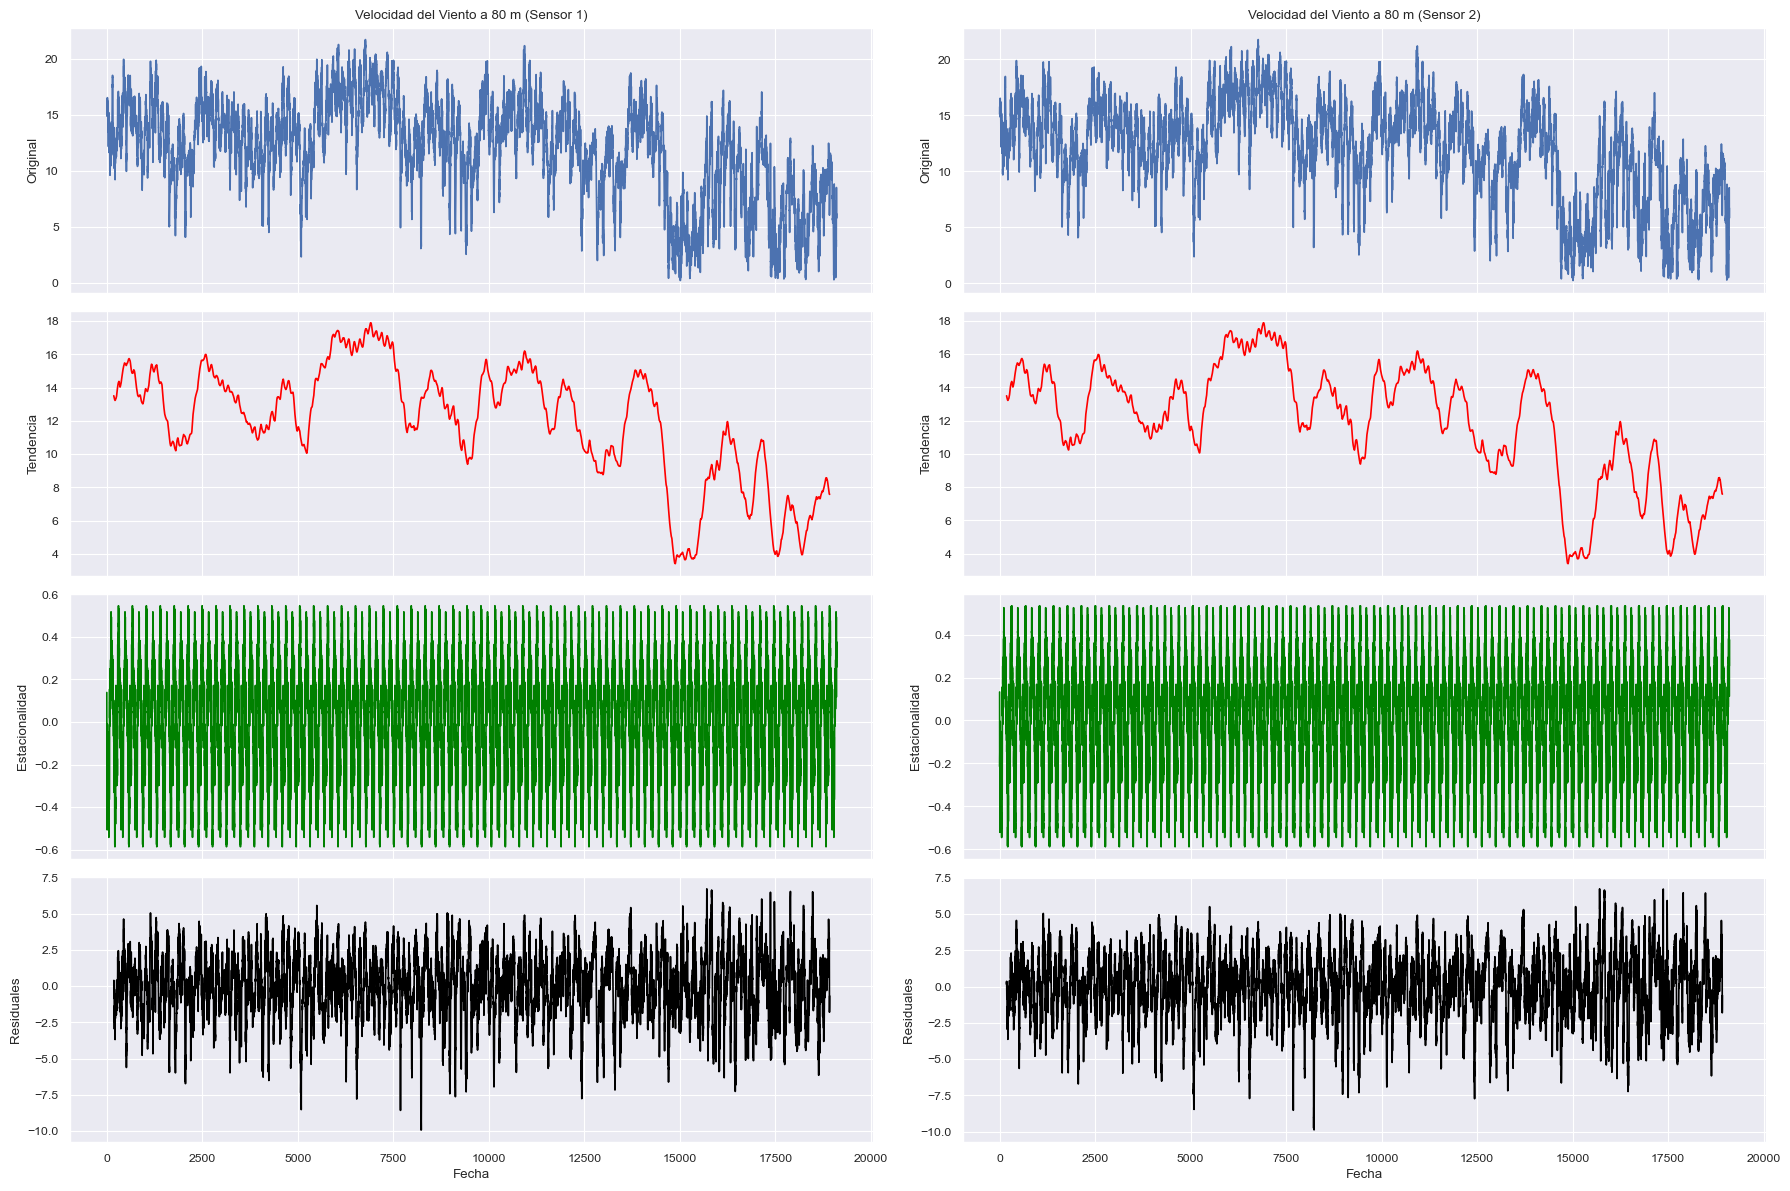

In [66]:
# Crear una figura con dos columnas para colocar cada descomposición en una sola fila
fig, axs = plt.subplots(4, 2, figsize=(18, 12), sharex=True)

# Llamar a la función `descomponer_serie` pasando los ejes para cada sensor
descomponer_serie(data, columna='VelViento80m_1', periodo=365, modelo='additive', 
                  titulo='Velocidad del Viento a 80 m (Sensor 1)', axs=axs[:, 0])

descomponer_serie(data, columna='VelViento80m_2', periodo=365, modelo='additive', 
                  titulo='Velocidad del Viento a 80 m (Sensor 2)', axs=axs[:, 1])

# Ajuste de la visualización
plt.tight_layout()
plt.show()

#### **Interpretación de los resultados**

Los gráficos proporcionan un análisis completo de la **velocidad del viento a 80 m** utilizando dos sensores con diferentes orientaciones (Sensor 1 - NW y Sensor 2 - SE). La serie original muestra variaciones en la velocidad del viento que alcanzan valores superiores a 20 m/s, indicando condiciones de viento fuertes en algunos momentos. En los gráficos de autocorrelación (ACF), se observa una alta autocorrelación en varios rezagos, lo que implica una fuerte dependencia temporal. La autocorrelación parcial (PACF) muestra que los primeros rezagos son los más significativos, indicando que los valores recientes de la serie son los que más influyen en su comportamiento.

La descomposición de ambas series revela componentes de tendencia, estacionalidad y ruido. La tendencia en ambas series muestra ciclos a lo largo del tiempo, lo cual sugiere patrones de cambio en la velocidad del viento debido a factores climáticos. La componente estacional es bastante regular y puede estar asociada a patrones diarios o estacionales de los vientos. Finalmente, los residuos no muestran patrones claros, lo cual es un buen indicio de que los componentes principales (tendencia y estacionalidad) explican la mayor parte de la variabilidad en la serie. La comparación entre sensores permite evaluar cómo varían las condiciones de viento según la orientación, lo cual es útil para la comprensión integral de la dinámica del viento a esta altura.

### **Variable: Velocidad del viento a 60m**

#### **Serie original**

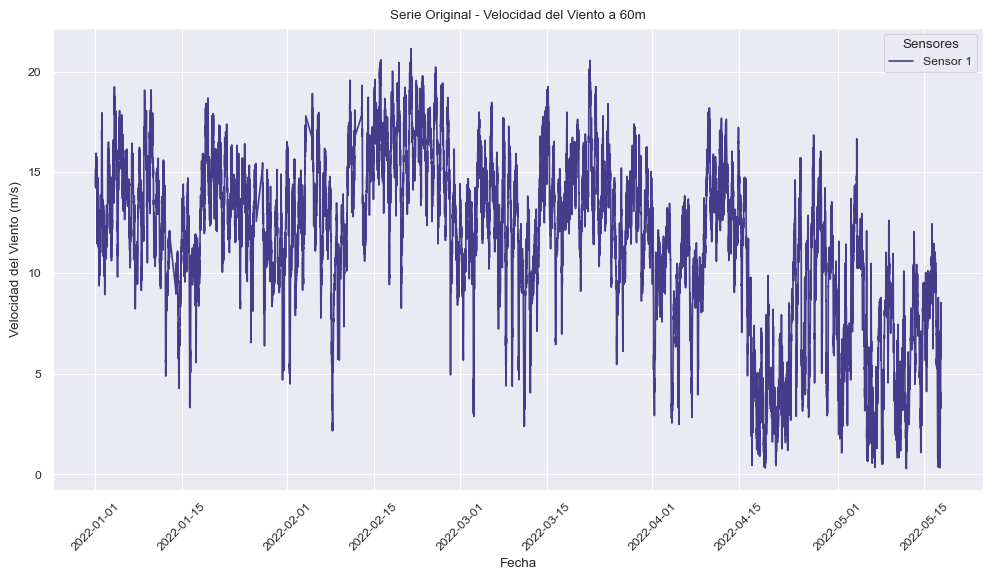

In [67]:
sns.set_theme()
sns.set_context("paper")

plt.figure(figsize = (12, 6))
sns.lineplot(data = data, x =  data['Fecha'], y = data['VelViento60m'], label = 'Sensor 1', color = '#473C8B')

plt.title('Serie Original - Velocidad del Viento a 60m')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend(title = 'Sensores', loc = 'upper right')
plt.xticks(rotation=45)

plt.show()

#### **Autocorrelación y autocorrelación parcial**

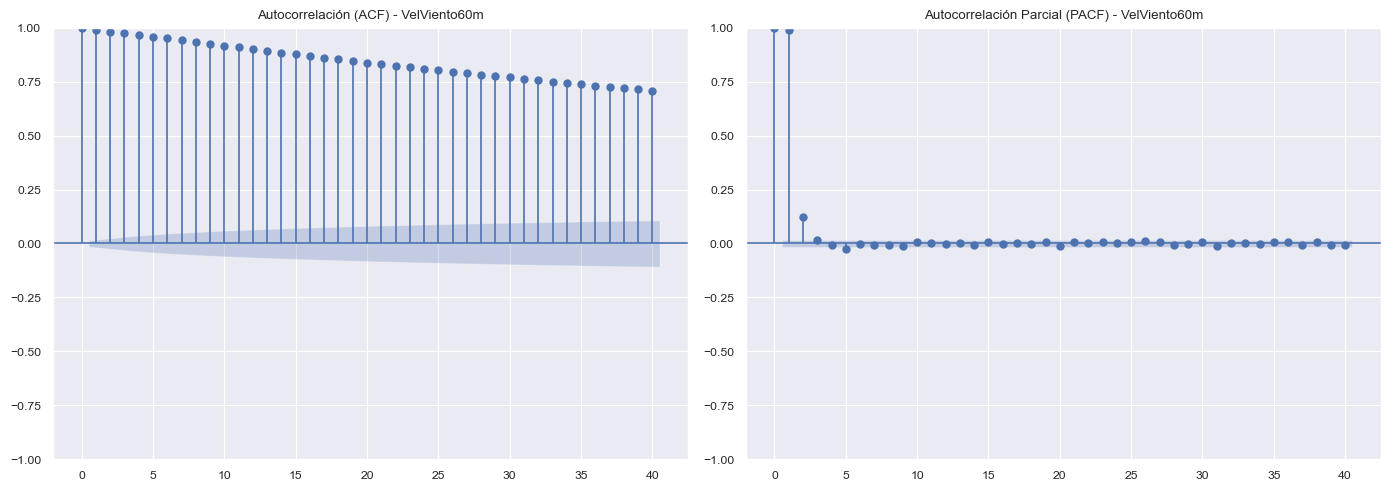

In [68]:
plot_acf_pacf(data, column = 'VelViento60m', title = 'VelViento60m')

#### **Descomposición de la serie**

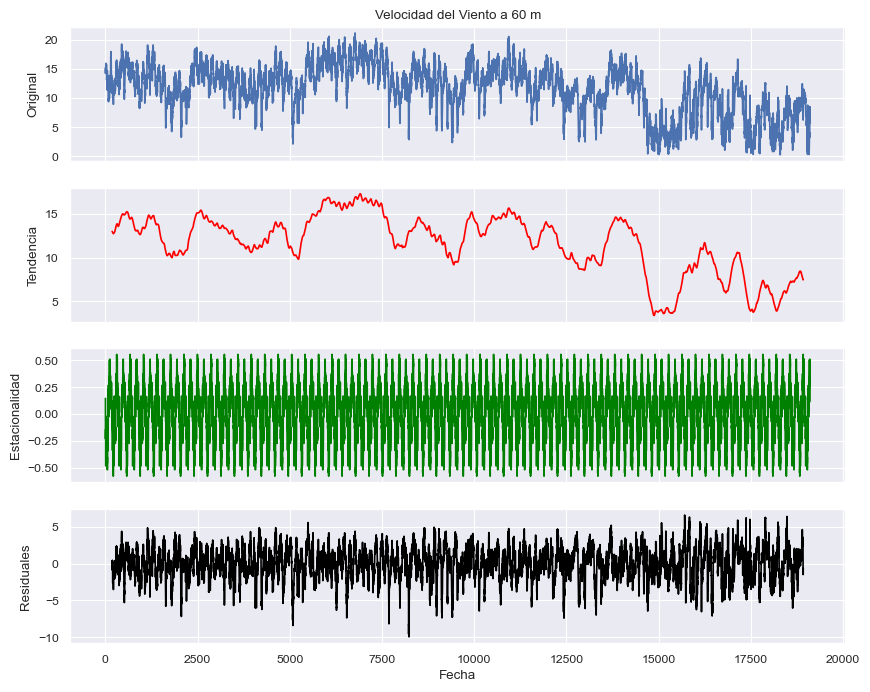

In [69]:
descomponer_serie(data, columna = 'VelViento60m', periodo = 365, modelo = 'additive', titulo = 'Velocidad del Viento a 60 m')

#### **Interpretación de los resultados**

La serie de tiempo de la velocidad del viento a 60 m presenta variaciones significativas a lo largo del tiempo, con picos que superan los 20 m/s y valores mínimos cercanos a 5 m/s. El gráfico de autocorrelación (ACF) muestra una fuerte correlación positiva en muchos rezagos, lo cual indica una dependencia temporal persistente en la serie. La autocorrelación parcial (PACF) sugiere que los valores inmediatos anteriores tienen una mayor influencia en la serie. La descomposición muestra cuatro componentes: la serie original, una tendencia suavizada, una componente estacional y los residuos. La tendencia refleja fluctuaciones cíclicas de mediano plazo en la velocidad del viento, mientras que la componente estacional exhibe un patrón regular que podría estar vinculado a variaciones diurnas o estacionales en la velocidad del viento. Los residuos parecen distribuirse alrededor de cero sin una estructura clara, lo cual sugiere que la mayor parte de la variabilidad en la serie se explica por las otras componentes

### **Variables: Dirección del viento a 100m, 80m y 60m**

Para comprender la relación entre la dirección del viento y su velocidad a diferentes alturas, se presentan gráficos de "Rosa de los Vientos" para alturas de 100 m, 80 m y 60 m. Las "Rosas de los Vientos" son herramientas visuales utilizadas en meteorología y estudios ambientales para mostrar la distribución de las velocidades del viento según su dirección de origen.

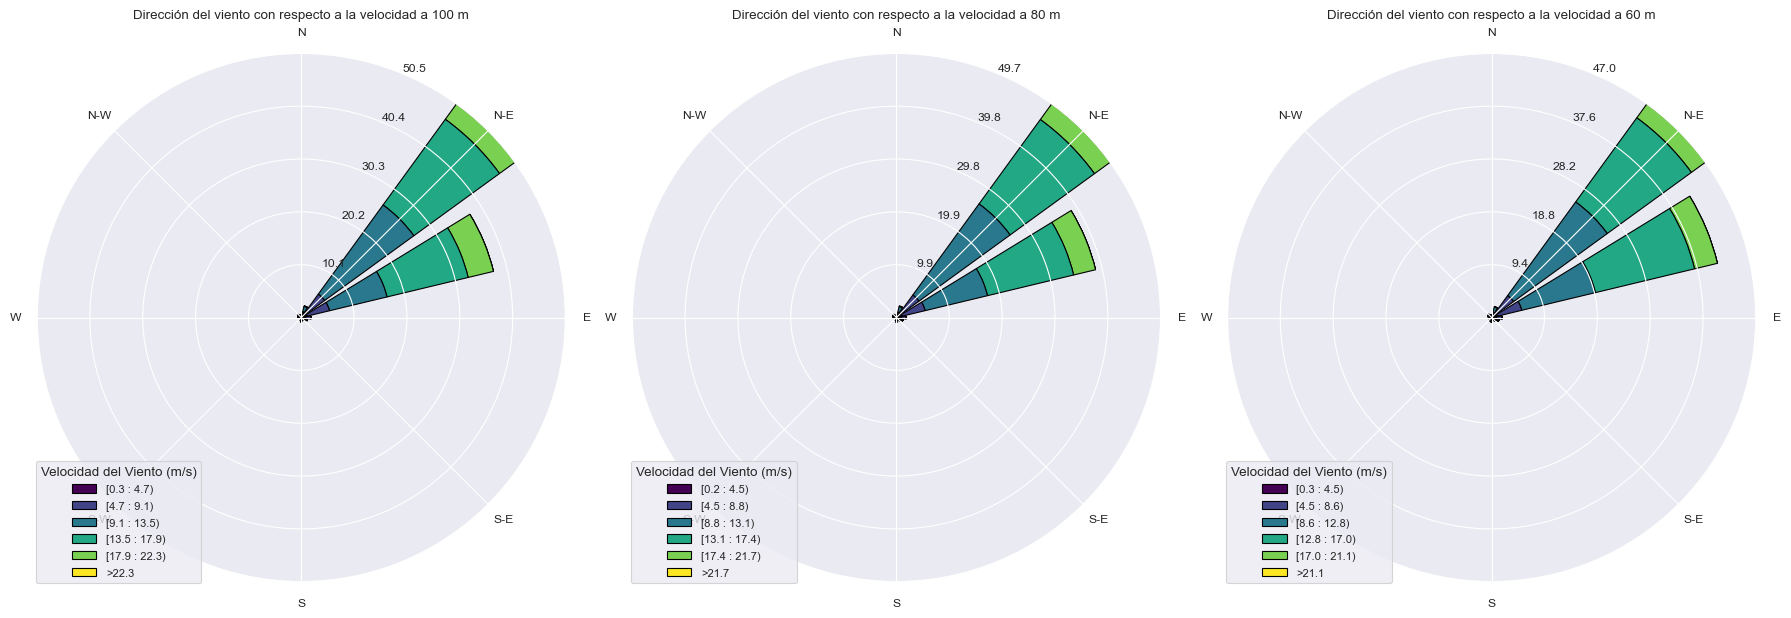

In [70]:
# Configura el tamaño de la figura y establece los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='windrose'))
color_palette = cm.viridis 

# Gráfico de dirección del viento a 100 m
ax = axes[0]
ax.bar(data['DirViento100m'], data['VelViento100m_1'], normed=True, opening=0.8, edgecolor='black', cmap=color_palette)
ax.set_title('Dirección del viento con respecto a la velocidad a 100 m')
ax.set_legend(title='Velocidad del Viento (m/s)', loc='lower left')

# Gráfico de dirección del viento a 80 m
ax = axes[1]
ax.bar(data['DirViento80m'], data['VelViento80m_1'], normed=True, opening=0.8, edgecolor='black', cmap=color_palette)
ax.set_title('Dirección del viento con respecto a la velocidad a 80 m')
ax.set_legend(title='Velocidad del Viento (m/s)', loc='lower left')

# Gráfico de dirección del viento a 60 m
ax = axes[2]
ax.bar(data['DirViento60m'], data['VelViento60m'], normed=True, opening=0.8, edgecolor='black', cmap=color_palette)
ax.set_title('Dirección del viento con respecto a la velocidad a 60 m')
ax.set_legend(title='Velocidad del Viento (m/s)', loc='lower left')

plt.tight_layout()
plt.show()


Los gráficos de la rosa de los vientos muestran una predominancia clara de vientos en dirección noreste (N-NE) en todas las alturas analizadas, específicamente para las velocidades del viento medidas a 100 m y 80 m con el sensor 1, y a 60 m. Las velocidades más altas, que superan los 17 m/s, también se orientan mayormente hacia el N-NE, mientras que las velocidades más bajas (en el rango de 0.3 a 4.5 m/s) se distribuyen entre el noreste y el sureste (SE). Esta tendencia es coherente con la ubicación del sensor, estratégicamente orientado hacia el noreste, lo cual favorece la captura de vientos predominantes de esa dirección. La estabilidad direccional observada en cada altura es un comportamiento esperado dada esta localización.

### **Variable: Presión**

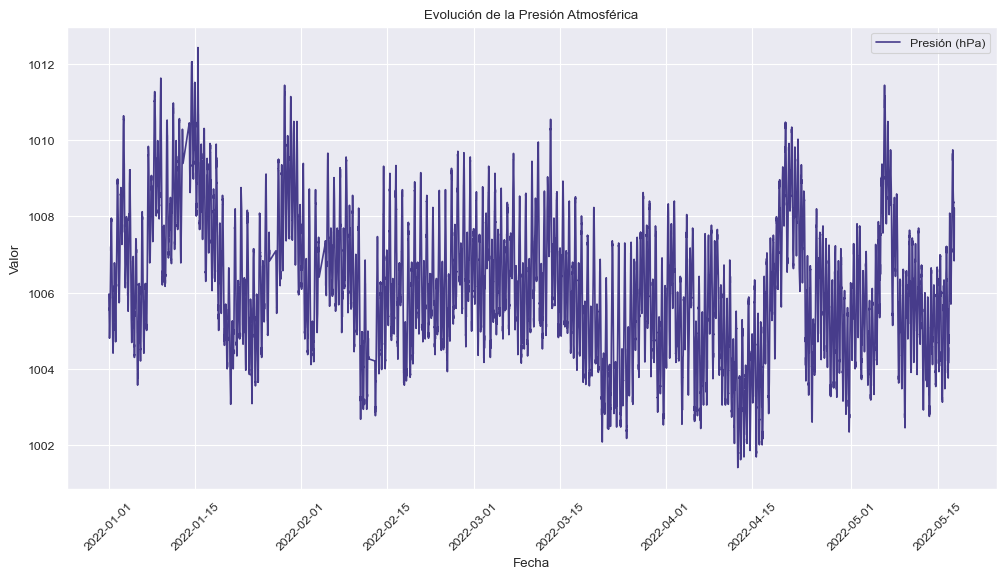

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(data['Fecha'], data['Presion'], color='#473C8B', label='Presión (hPa)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Evolución de la Presión Atmosférica')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


La gráfica muestra la evolución temporal de la presión atmosférica en hectopascales (hPa). A lo largo del periodo observado, la presión presenta una variabilidad significativa, con oscilaciones que indican cambios frecuentes en las condiciones atmosféricas. Se observa una tendencia general a la baja en los primeros meses, alcanzando valores mínimos cercanos a 1004 hPa a mediados de enero. Posteriormente, hay una recuperación gradual hacia valores más altos en los meses siguientes, con picos ocasionales que alcanzan cerca de 1012 hPa. Estas fluctuaciones pueden estar asociadas a sistemas de alta y baja presión que afectan las condiciones climáticas de la región, lo cual es característico en climas con variabilidad estacional. 

### **Variable: Humedad**

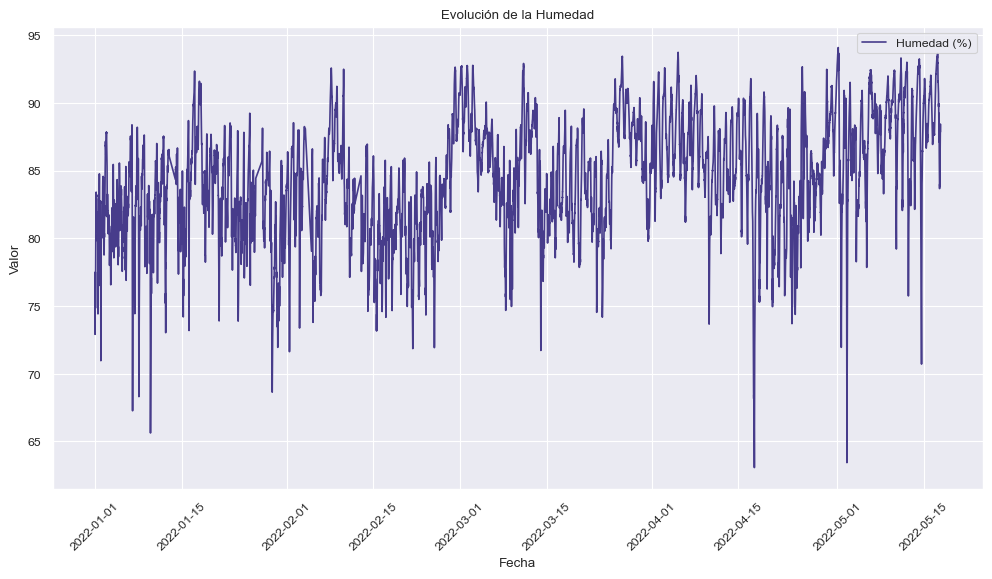

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(data['Fecha'], data['Humedad'], color='#473C8B', label='Humedad (%)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Evolución de la Humedad')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

La gráfica muestra la variación de la humedad relativa a lo largo del tiempo. Se observa que los valores de humedad fluctúan entre el 70% y el 90%, con picos ocasionales que superan el 90%, y caídas hasta cerca del 65%. La serie evidencia cambios frecuentes, posiblemente relacionados con condiciones climáticas variables como lluvias o periodos secos. Además, a partir de febrero se aprecia un ligero aumento en la frecuencia de valores altos de humedad, lo que podría estar vinculado a cambios estacionales o eventos específicos en el clima de la región. 

### **Variables: Temperatura a 100m y 20m**

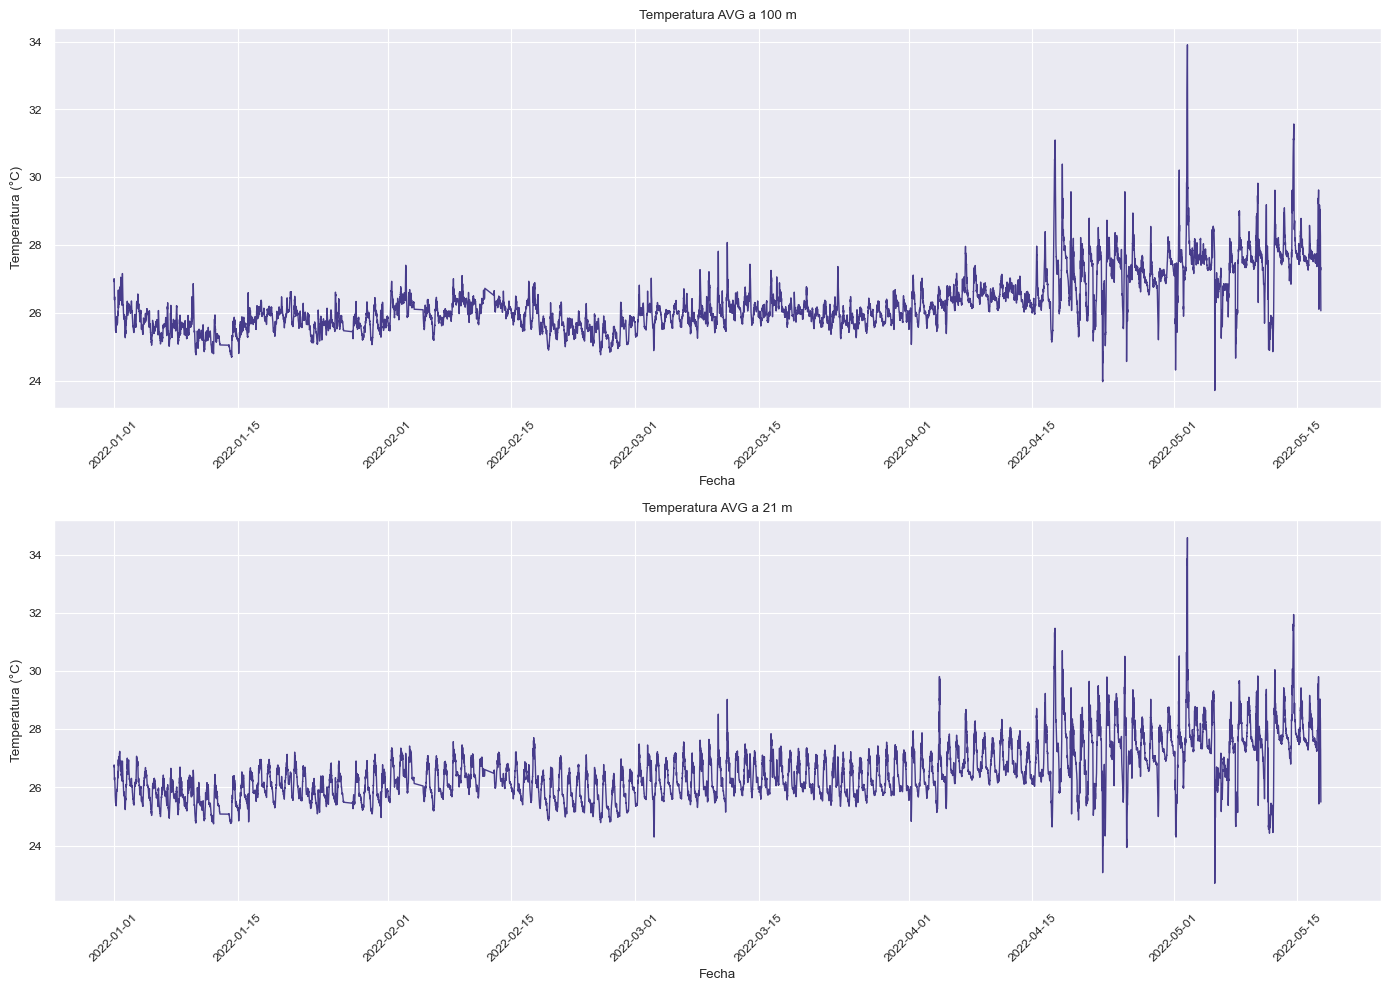

In [73]:
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# 1. Gráfico de Temperatura AVG a 100 m
axs[0].plot(data['Fecha'], data['Temp100m'], color = '#473C8B', linewidth=1)
axs[0].set_title('Temperatura AVG a 100 m')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Temperatura (°C)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(True)

# 2. Gráfico de Temperatura AVG a 21 m
axs[1].plot(data['Fecha'], data['Temp21m'], color='#473C8B', linewidth=1)
axs[1].set_title('Temperatura AVG a 21 m')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Temperatura (°C)')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)

plt.tight_layout()
plt.show()


La serie temporal de temperaturas promedio a 100 m y 20 m de altura revela una estabilidad relativa, con valores que oscilan entre 24 °C y 28 °C en la mayor parte del periodo observado. Sin embargo, hacia finales de marzo y principios de abril, se registran aumentos bruscos que superan los 32 °C, especialmente a la altura de 100 m, lo cual podría reflejar eventos atmosféricos específicos o cambios estacionales. A 100 m, se observan variaciones ligeramente más amplias en comparación con 20 m, posiblemente debido a una menor influencia de la superficie terrestre, lo que permite una mayor oscilación en los registros de temperatura.

### **Prueba de estacionariedad: Dickey-Fuller**

En esta sección, se lleva a cabo la prueba de `Dickey-Fuller Aumentada (ADF)` para evaluar la estacionariedad de las series de tiempo seleccionadas en el análisis. La estacionariedad es un supuesto crucial en muchos métodos de modelado de series temporales, como ARIMA, y se refiere a la constancia de las propiedades estadísticas de una serie a lo largo del tiempo, es decir, que la media, la varianza y la autocorrelación no cambian con el tiempo.

- **Hipótesis Nula (H₀)**: La serie de tiempo es NO estacionaria (tiene una raíz unitaria)

- **Hipótesis Alternativa (H₁)**: La serie de tiempo es estacionaria (no tiene una raíz unitaria)


In [74]:
resultados_adf = {}

# Realizar la prueba de Dickey-Fuller Aumentada para cada variable
for variable in data.columns[1:]:
    serie = data[variable].dropna()  
    adf_result = adfuller(data[variable].tolist())
    
    resultados_adf[variable] = {
        'Estadístico ADF': adf_result[0],
        'p-value': adf_result[1]
    }

resultados_adf_df = pd.DataFrame(resultados_adf).T
resultados_adf_df

,Estadístico ADF,p-value
VelViento100m_1,-8.661787,4.800586e-14
VelViento100m_2,-8.689101,4.086498e-14
VelViento80m_1,-8.793131,2.212792e-14
VelViento80m_2,-8.797830,2.152317e-14
VelViento60m,-8.929436,9.906884e-15
DirViento60m,-10.192249,6.277660e-18
DirViento100m,-10.461388,1.356205e-18
DirViento80m,-10.250230,4.505855e-18
Presion,-5.448123,2.681878e-06
Humedad,-12.551317,2.202757e-23


La prueba de Dickey-Fuller aumentada (ADF) realizada para cada variable arroja valores de p-value extremadamente bajos, todos significativamente menores que el nivel de significancia común (0.05). Esto indica que podemos rechazar la hipótesis nula de que existe una raíz unitaria en cada serie, sugiriendo que todas las variables son estacionarias. En términos prácticos, la estacionariedad implica que las propiedades estadísticas de las series (como la media y la varianza) se mantienen constantes a lo largo del tiempo, lo cual es favorable para modelos de series temporales, ya que facilita la modelación y predicción de las mismas.

### **Valores atípicos**

Para identificar la presencia de datos atípicos, analizaremos los histogramas y diagramas de cajas y bigotes de cada variable. Estos gráficos nos permitirán observar la distribución de los datos y detectar valores que puedan desviar a la variable de una distribución normal, revelando posibles anomalías o valores extremos.


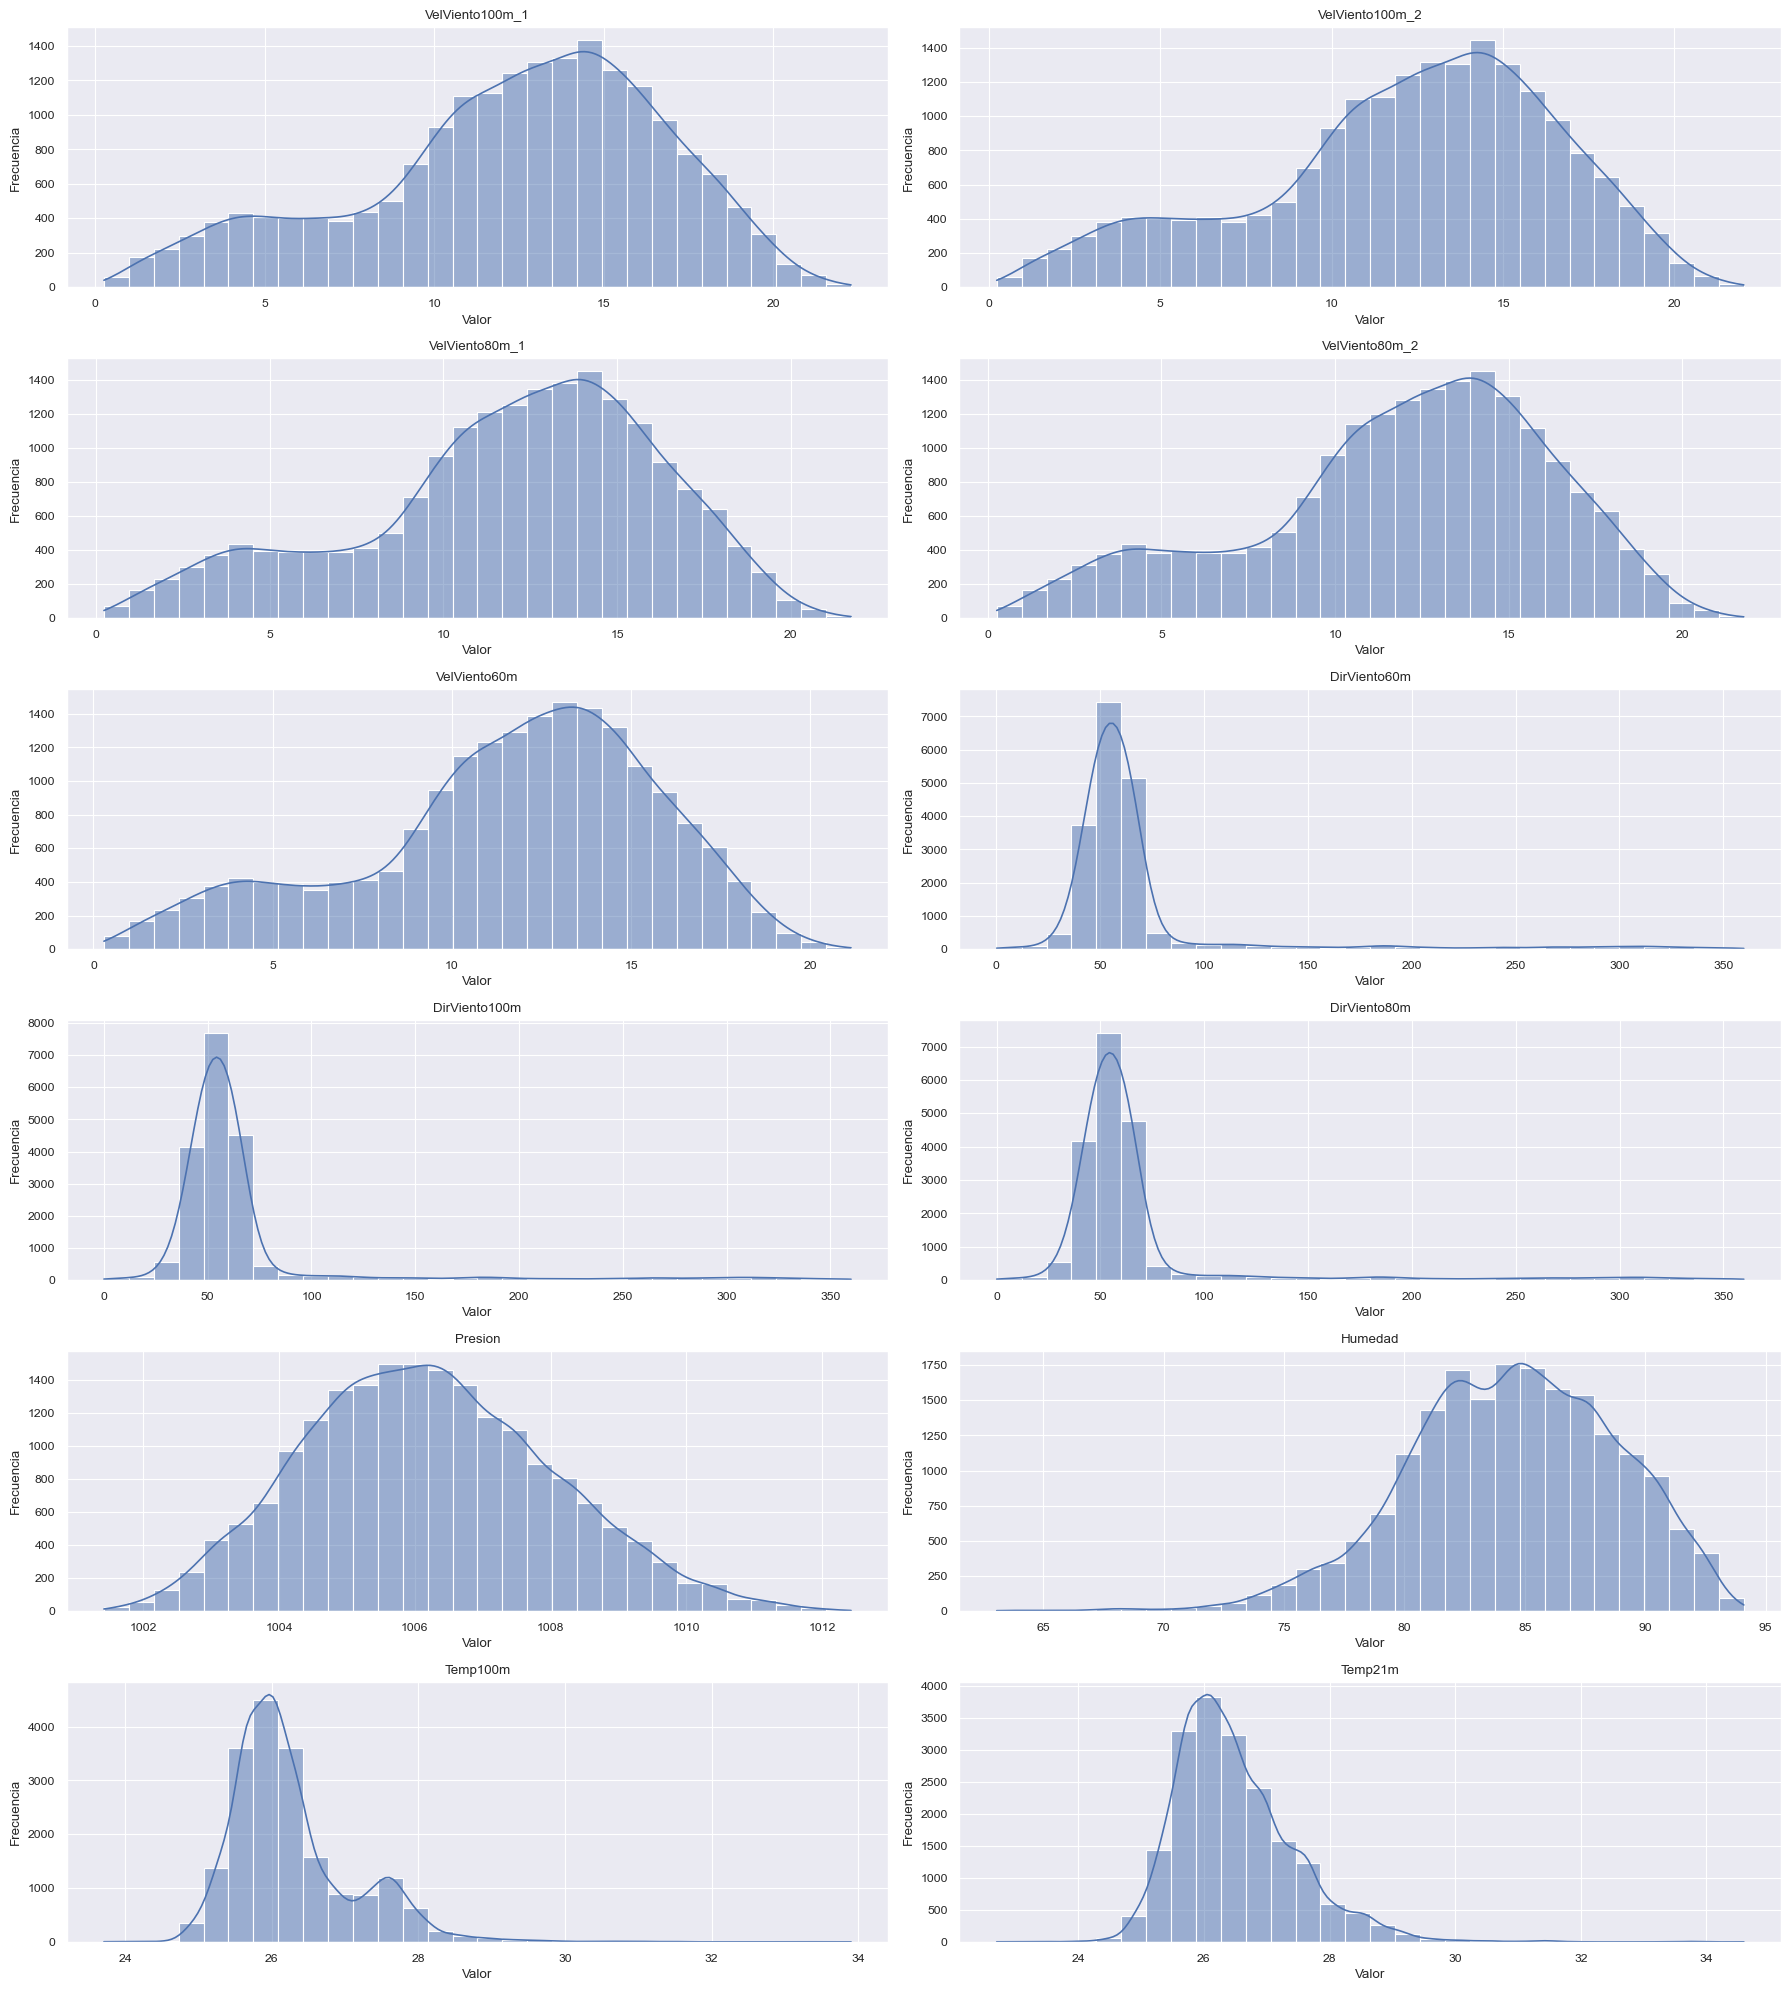

In [75]:
sns.set_theme()
sns.set_context("paper")
plt.figure(figsize=(18, 20)) 
for i, column in enumerate(data.select_dtypes(include='number').columns, 1):
    plt.subplot(6, 2, i)  
    sns.histplot(data[column], bins = 30, kde = True)  # Histograma con estimación de densidad KDE
    plt.title(column)
    plt.xlabel("Valor")  
    plt.ylabel("Frecuencia")  
    
plt.tight_layout()
plt.show()


Los histogramas muestran la distribución de cada variable en el conjunto de datos, revelando diferentes patrones. Las variables de **velocidad del viento** (``VelViento100m_1``, ``VelViento100m_2``, ``VelViento80m_1``, ``VelViento80m_2``, ``VelViento60m``) presentan distribuciones asimétricas hacia la derecha, con la mayoría de los valores entre 10 y 15 m/s, indicando que las velocidades altas son menos comunes. Las variables de **dirección del viento** (``DirViento60m``, ``DirViento100m``, ``DirViento80m``) tienen una distribución casi uniforme, reflejando que las direcciones del viento están dispersas en un rango amplio de valores, aunque hay una ligera concentración en torno a los 50-100° (noreste). La **presión atmosférica** (``Presion``) muestra una distribución aproximadamente normal, centrada alrededor de 1006 hPa, lo que indica estabilidad en los valores de presión. La **humedad relativa** (``Humedad``) sigue una distribución normal, con la mayoría de los valores entre 80% y 90%, reflejando condiciones de alta humedad. Finalmente, las variables de **temperatura** (``Temp100m`` y ``Temp21m``) tienen una distribución bimodal con picos alrededor de 26-28 °C y 30-32 °C, sugiriendo posibles variaciones estacionales o influencias climáticas.

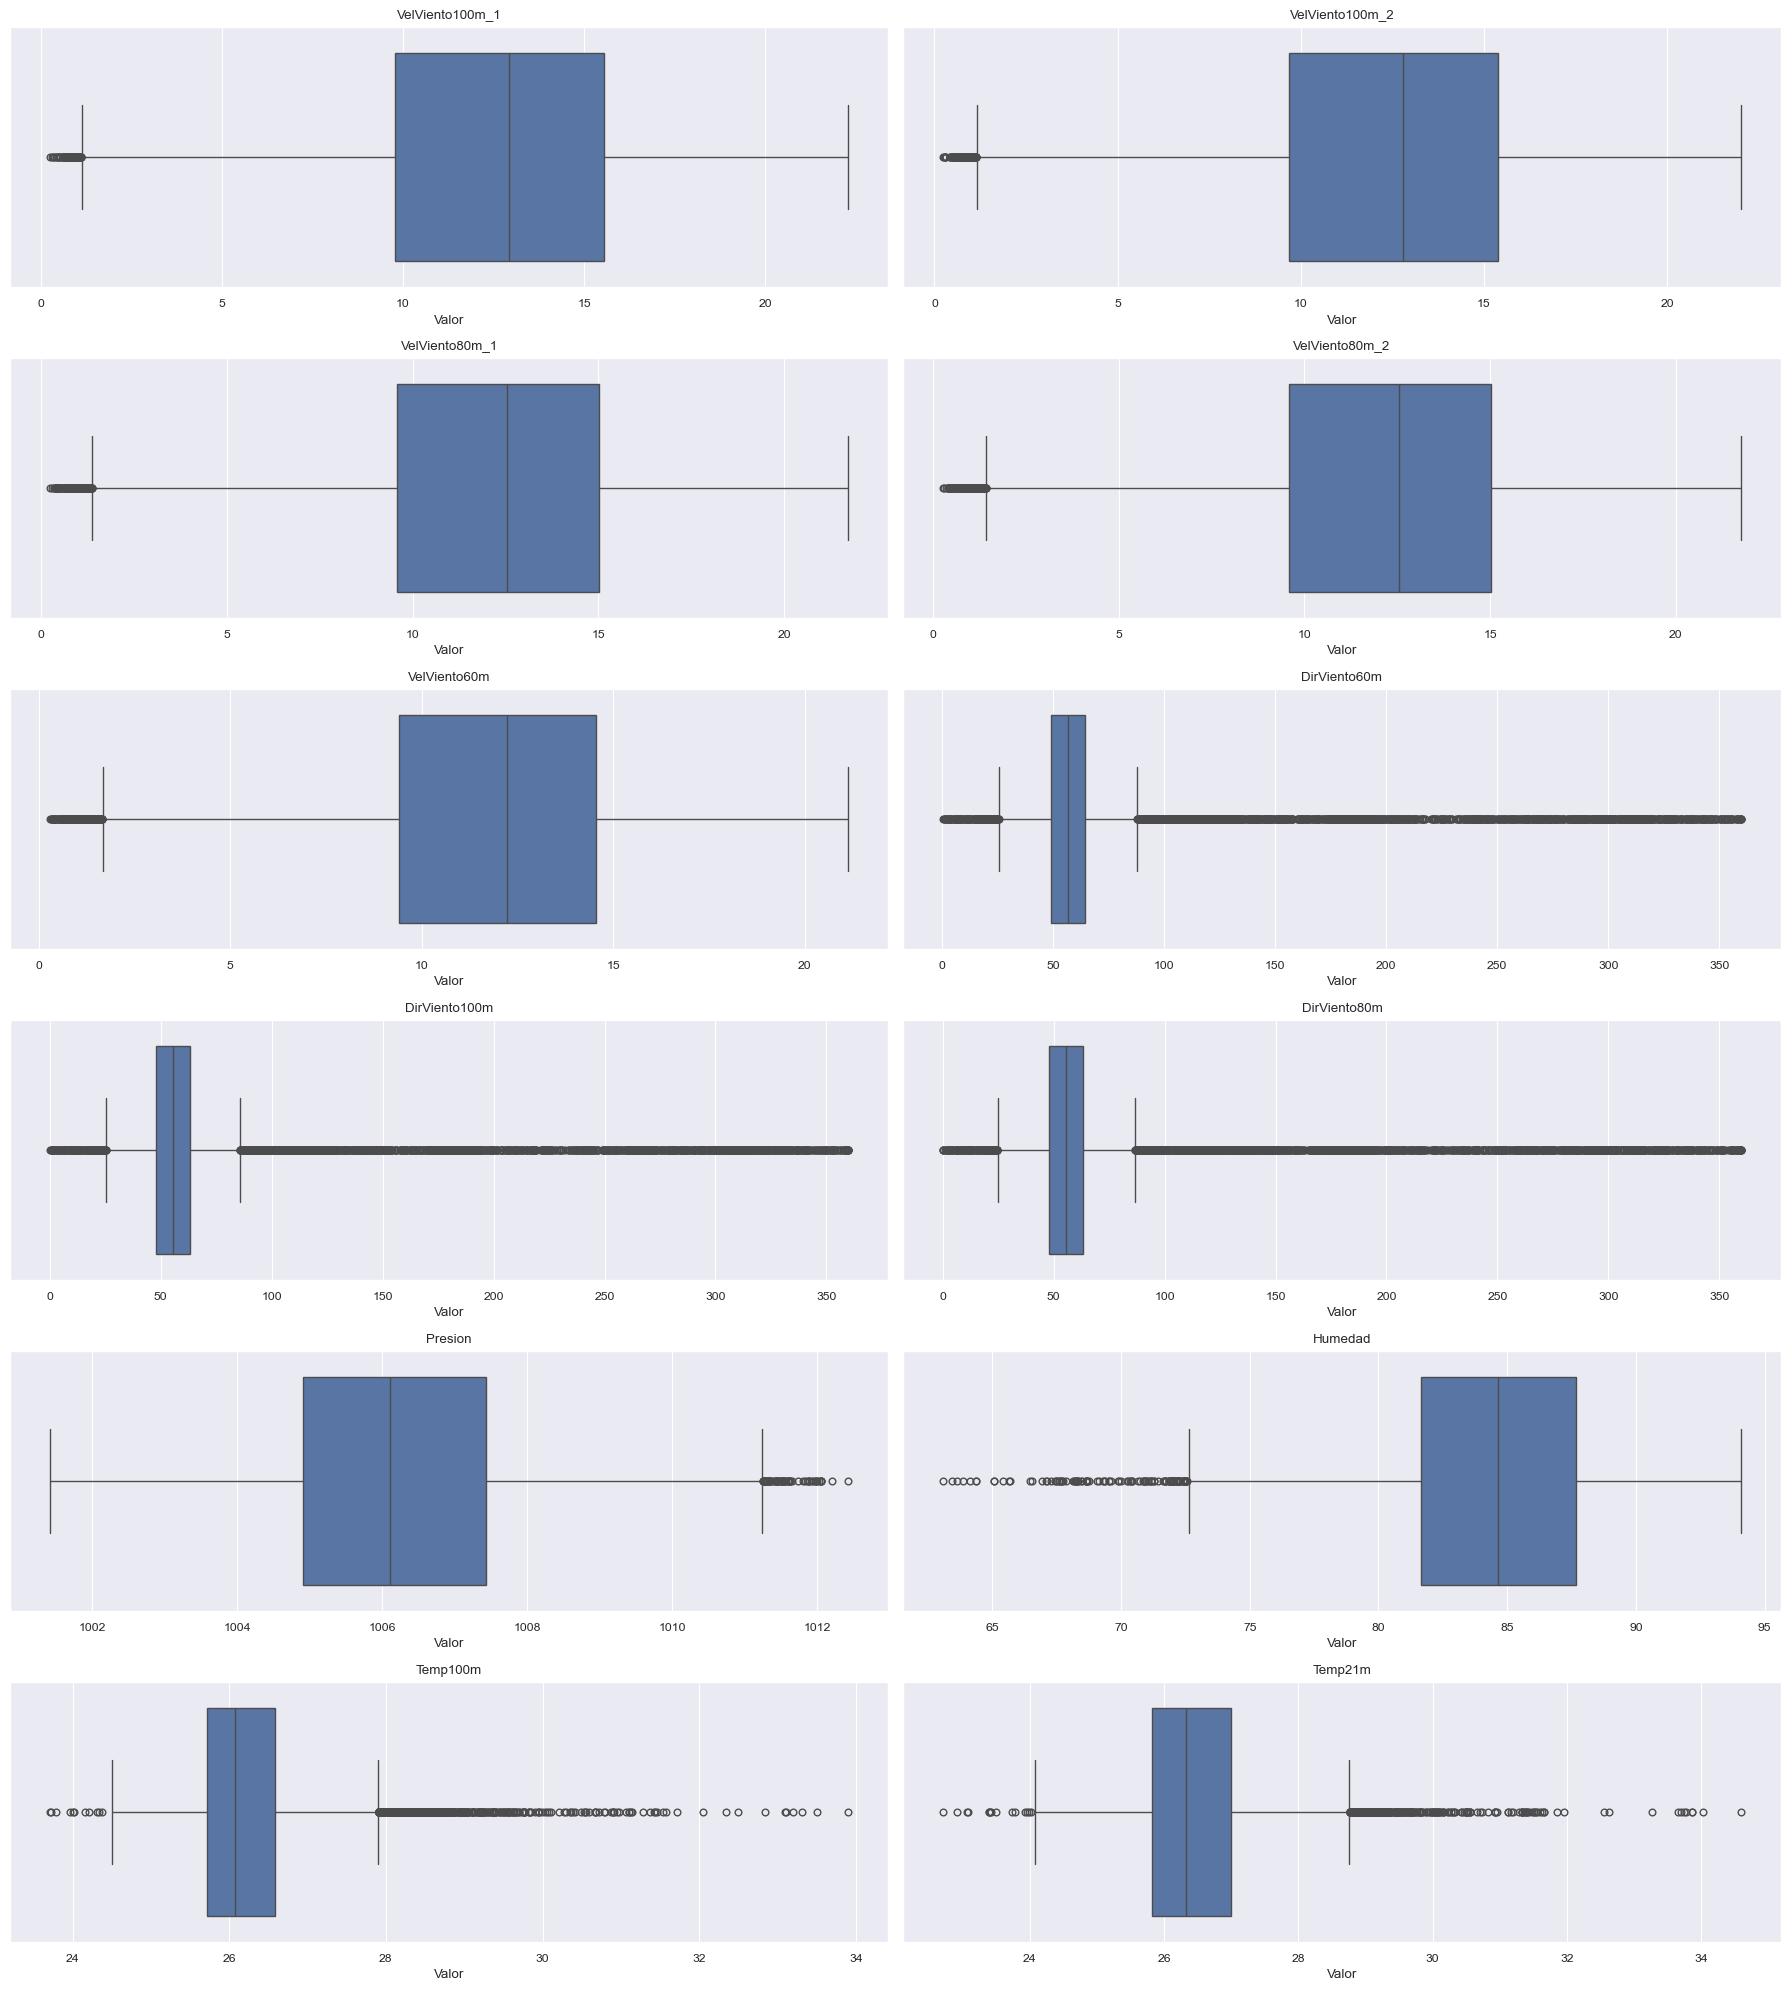

In [76]:
plt.figure(figsize=(18, 20))  
for i, column in enumerate(data.select_dtypes(include = 'number').columns, 1):
    plt.subplot(6, 2, i) 
    sns.boxplot(data = data, x = column)  
    plt.title(column)
    plt.xlabel("Valor")  
    
plt.tight_layout()
plt.show()


Los diagramas de cajas y bigotes muestran la presencia de datos atípicos en varias de las variables analizadas. En las variables de **dirección del viento** (``DirViento60m``, ``DirViento100m``, y ``DirViento80m``), los atípicos son especialmente numerosos y están distribuidos en un amplio rango, lo cual es característico de este tipo de datos direccionales y su variabilidad. Las variables de **velocidad del viento** (``VelViento100m_1``, ``VelViento100m_2``, ``VelViento80m_1``, ``VelViento80m_2``, ``VelViento60m``) presentan pocos atípicos, la mayoría en valores bajos y altos, sugiriendo variaciones extremas en la intensidad del viento, aunque en un rango limitado.

En la **presión atmosférica** (``Presion``), se observan algunos valores atípicos por encima de 1010 hPa, los cuales representan desviaciones de una distribución normal. En el caso de la **humedad** (``Humedad``), los valores atípicos son menos frecuentes y se concentran en los valores bajos, posiblemente reflejando eventos específicos de baja humedad. Por último, las variables de **temperatura** (``Temp100m`` y ``Temp21m``) muestran atípicos principalmente en los valores altos, sobre los 30 °C, lo que podría estar asociado a episodios de calentamiento extremo.


Aunque se ha identificado la presencia de valores atípicos en las variables no se procederá a su imputación, ya que estos valores se consideran normales en el contexto específico de este fenómeno meteorológico. La velocidad del viento es inherentemente variable y puede presentar fluctuaciones significativas debido a factores locales, estacionales y climáticos, los cuales son naturales y esperados en el ámbito de estudios meteorológicos. Imputar estos datos podría distorsionar el análisis al suavizar artificialmente variaciones propias del comportamiento del viento. Cabe mencionar que la base de datos ya ha sido sometida a un proceso de limpieza en el cual se eliminaron los valores considerados erróneos bajo criterios definidos previamente, asegurando que únicamente se mantengan los datos válidos. De este modo, el análisis conserva tanto la integridad de los datos como la representatividad de las condiciones reales del entorno estudiado.

## **Base de datos para modelos**

Después de realizar el análisis, transformación y preparación del conjunto de datos, la base de datos final generada para la construcción de los modelos es `ws_modelos`.

In [82]:
ruta_guardado = r'C:\Users\kamac\OneDrive\Desktop\MachineLearningUN\EDA\ws_modelos.xlsx'
data.to_excel(ruta_guardado, index = False )  